<a href="https://colab.research.google.com/github/KatherineDG/EstudioDengueCienciaDeDatos/blob/main/DengueCienciaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Conformar Equipo**



Nombre del equipo:

**Dengue**

Integrantes:
*   Piersanti, Lucas Gabriel
*   Ramirez, Fernando
*   Casal Vazquez, Christian Javier
*   Doméq Gavilán, Katherine
*   Prieto, Tomas Gustavo Sebastian

# 2. **Elegir Dataset**



Dataset: Reporte Epidemiológico de Dengue -
https://data.buenosaires.gob.ar/dataset/reporte-epidemiologico-de-dengue

Información adicional del dataset:
- Rubro salud
- Se publicó en la fecha de 17 de Mayo del 2023
- Sigue en actualización cada semana

# 3. **Valor aportado al negocio**



Al realizar un análisis sobre el dataset relacionado con los casos del dengue en la Ciudad de Buenos Aires proporcionado el Gobierno, podríamos obtener resultados que, en base a ellos, se podrian tomar decisiones estratégicas con el objetivo de disminuir los casos del dengue y así también evitar hasta muertes que provoca la enfermedad. Esto, ademas de ser algo beneficioso para la población, es una oportunidad para los gobiernos de reducir el gasto publico en campañas de prevención del dengue.
 Además, también se identificarían puntos críticos donde se tomarían con más énfasis y así distribuirían mejor sus recursos en planes de fumigación, centros de salud/enfermería, campañas de concientización, entre otros, por ejemplo.

Algunas hipótesis que planteamos son:
- Quienes pertenecen a los grupos etarios de Infancia y Vejez son más propensos a contraer la enfermedad debido a que pueden poseer un sistemma inmunológico no desarrollado (infantes) o debilitado (ancianos).
- Quienes pertenecen a los grupos etarios de Juventud y Adultez son propensos a contraer la enfermedad debido ya que son quienes más se movilizan ya sea por estudio, trabajo u ocio.
- Las condiciones climáticas de las zonas, ya sean precipitaciones, temperaturas, humedad, pueden influir en la propagación de los mosquitos con dengue y así la misma enfermedad (Existen predicciones de hasta 15 días futuros sobre los estados climáticos de una zona, así que se puede mitigar el crecimiento de casos de dengue utilizando eso).
(si en capital federal se registraron más casos luego de cuando se llegó a ciertas temperaturas, precipitaciones, humedad esta hipotesis seria verdadera)
- Junto a la hipótesis anterior también lo acompaña las cuatro estaciones del año, que dependiendo en cuál se esté tambien puede influir en la activación de los mosquitos y los casos de dengue.
- La cantidad de personas o densidad de población que haya en cierta zona/área puede ser una respuesta sobre la cantidad de casos de dengue que se confirman, siendo pocos o muchos.


# **Diagrama de Arquitectura general de DatawareHouse**

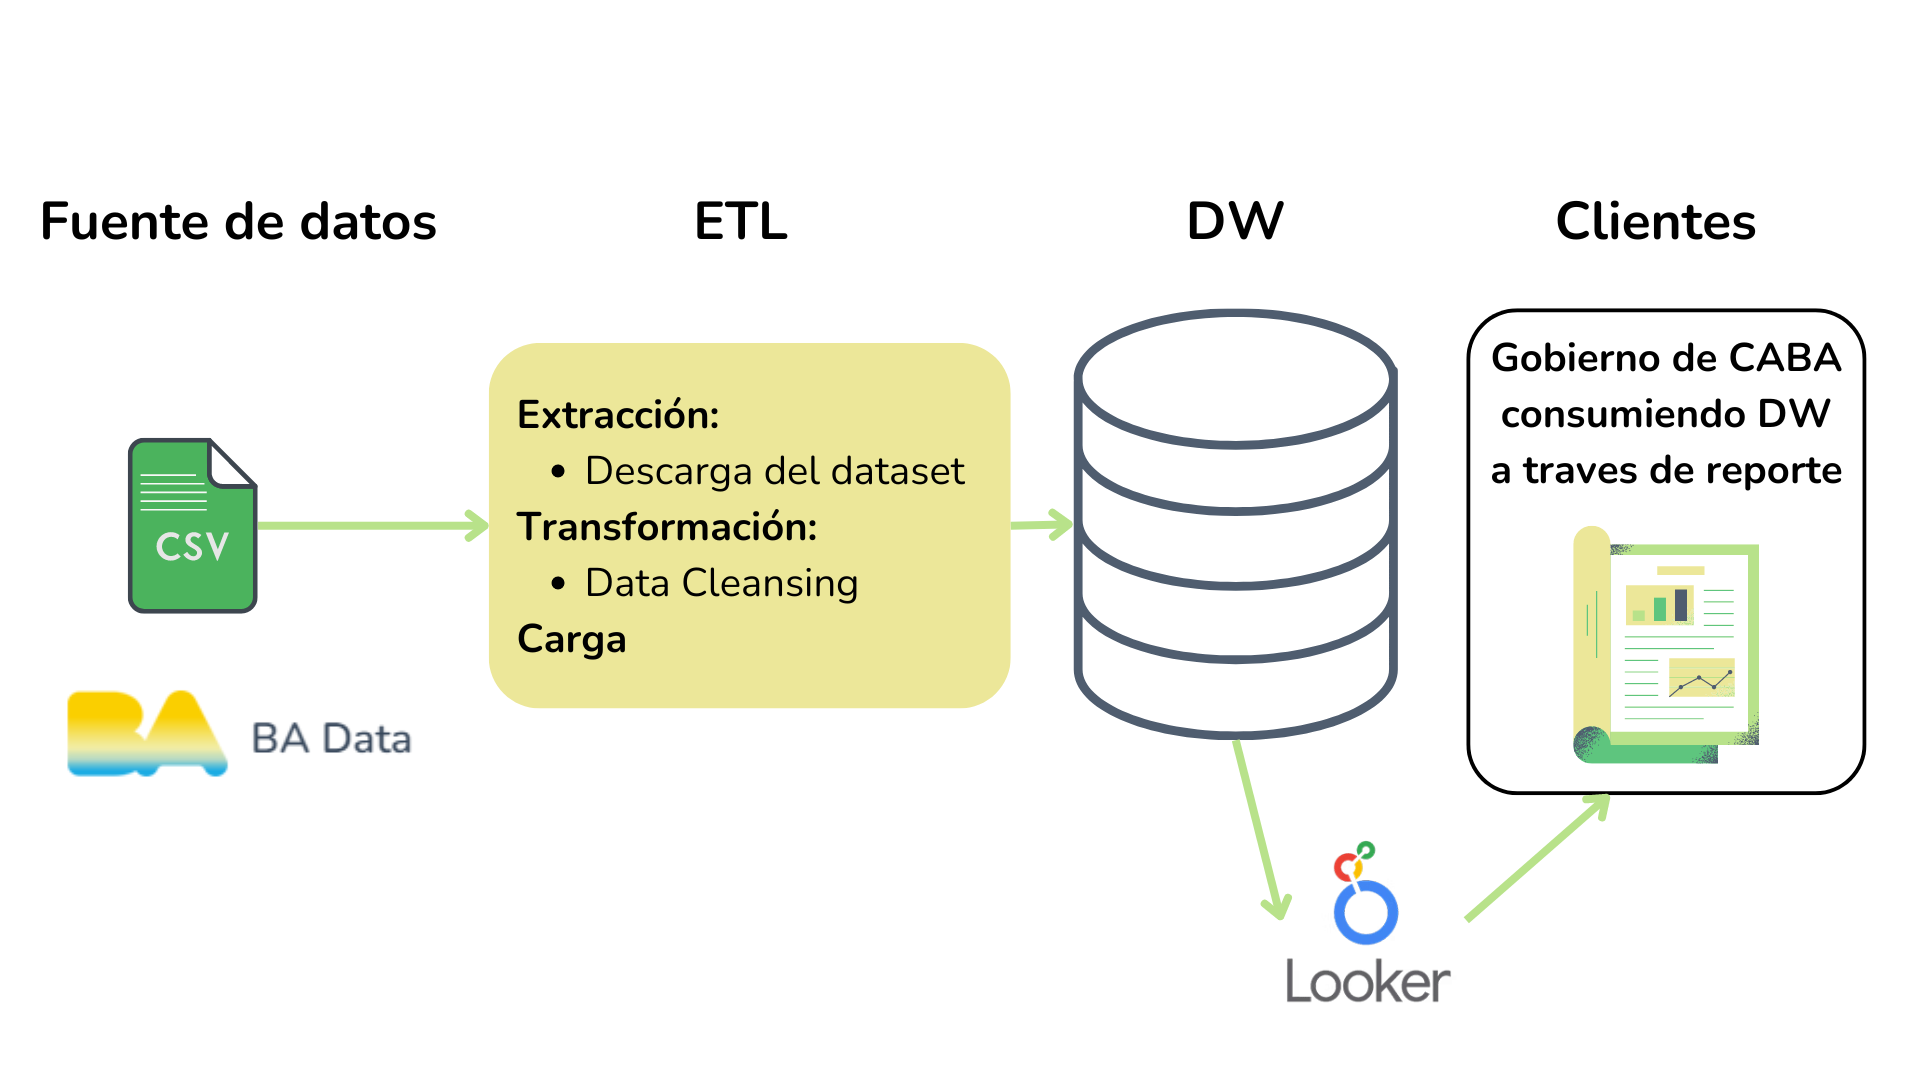

# 4. **Limpieza del dataset** (5 formas alineadas a las necesidades del negocio)

In [ ]:
#https://www.w3schools.com/python/pandas/pandas_cleaning.asp

import pandas as pd
from datetime import datetime


''' Lectura del archivo csv '''
datasetDengueFrame = pd.read_csv('/content/casos_dengue.csv', sep=';')

datasetDengueFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   ano                                       6007 non-null   int64 
 1   semana_epidemiologica                     6007 non-null   int64 
 2   fecha_inicio_semana_epidemiologica        6007 non-null   object
 3   grupo_etario                              6007 non-null   object
 4   departamento_residencia                   6007 non-null   object
 5   n_notificaciones                          6007 non-null   int64 
 6   n_confirmados_probables_fis               6007 non-null   int64 
 7   n_confirmados_por_laboratorio             6007 non-null   int64 
 8   n_internados_fecha_internacion            6007 non-null   int64 
 9   n_internados_uti_fecha_internacion        6007 non-null   int64 
 10  n_fallecidos_confirmados_por_laboratorio  6007 n

**1) Realizar suplantacion de datos para algun valor faltante de interés detectadas en las filas del dataset.**

Justificación: Si falta algún valor que es de nuestro interés para la realización de nuestros análisis, por medio del uso de otros datasets estimaremos aquel valor faltante.

datasets auxiliares:
- "Distribución porcentual de la población por grupos de edad según comuna".
- "Proyecciones de población por grupo de edad y comuna según sexo. Ciudad de Buenos Aires. Años 2010/2025"
- Distribución porcentual y proyectual de la población por grupos de edad según comuna generado"


Según la métrica de **completitud**, analizada en el punto siguiente, notamos que hay valores faltantes en las columnas "grupo_etario" y "departamento_residencia", aquellos son datos que necesitariamos utilizar para nuestros análisis por lo tanto determinamos tres casos:

1. "grupo_etario" y "departamento_residencia" faltantes: se elimina la fila.
2. "departamento_residencia" con valor faltante: se suplanta el valor.
3. "grupo_etario" con valor faltante: se suplanta el valor.

el caso (1) sucede, eliminamos la fila ya que necesitamos de alguno de los dos datos para poder realizar la estimación de uno o el otro.

si caso (2) sucede, identificamos el grupo etario donde el valor de "departamento_residencia" es "SIN DATOS". Luego del dataset auxiliar se revisa la proporción de la población del grupo etario por comuna y asumiendo que la distribución del dengue es proporcional a la población en cada comuna, estimamos que la comuna más probable de ser el valor faltante es aquella que tiene la mayor proporción de personas en ese grupo etario.

si caso (3) sucede, identificamos la comuna donde el valor de "grupo_etario" es "SIN DATOS". Luego del dataset auxiliar se revisa la proporción de la población de la comuna por grupo etario y asumiendo que la distribución del dengue es proporcional a la población en cada comuna, estimamos que el grupo etario más probable de ser el valor faltante es aquella que tiene la mayor proporción de personas en esa comuna.

In [ ]:
import re #para extraer el numero de comunas del dataset dengue

# Aquellas celdas donde haya "SIN DATOS" los consideramos como valores nulos
datasetDengueFrame.replace('SIN DATOS', pd.NA, inplace=True)

#datasetDengueFrame.info()

#CASO 1

# Contar el número de filas donde ambos valores 'grupo_etario' y 'departamento_residencia' son nulos
null_ge_dr = datasetDengueFrame[datasetDengueFrame['grupo_etario'].isnull() & datasetDengueFrame['departamento_residencia'].isnull()]
print(f"Cantidad de filas donde 'grupo_etario' y 'departamento_residencia' son nulos: {len(null_ge_dr )}")

# Eliminar las filas que cumplen la condicion 'grupo_etario' y 'departamento_residencia' son nulos al mismo tiempo
datasetDengueFrame = datasetDengueFrame.dropna(subset=['grupo_etario', 'departamento_residencia'], how='all')

#datasetDengueFrame.info()




#CASO 2


def suplantar_comuna(dfPoblacion, dfDengue, filtro_ano, grupo_etario_comunaNull):
  df_ano = dfPoblacion[dfPoblacion['ano'] == filtro_ano]
  #print(df_ano)


  # listado de los grupos estarios donde la comuna era null, no repetidos
  grupo_etario_comunaNull_ano = grupo_etario_comunaNull[grupo_etario_comunaNull['ano'] == filtro_ano]['grupo_etario'].unique().tolist()
  #print(grupo_etario_comunaNull_ano)

  for i in range(len(grupo_etario_comunaNull_ano)):
    #print(i)

    max_porcentaje_poblacional = df_ano[grupo_etario_comunaNull_ano[i]].values.max()
    #print(max_porcentaje_poblacional)

    # Encontrar el índice de la fila que contiene el valor del max en la columna del grupo etario'
    indice_max_valor = df_ano[df_ano[grupo_etario_comunaNull_ano[i]] == max_porcentaje_poblacional]['nro_comuna'].idxmax() + 1
    #print(indice_max_valor)

    # Usa el índice de la fila para obtener el valor de 'nro_comuna'
    comuna_max_valor = df_ano.loc[indice_max_valor, 'nro_comuna']
    print(comuna_max_valor)

    # Obtener los indices de las filas afectadas por este caso para realizar la suplantacion
    indices_filas_afectadas = grupo_etario_comunaNull[(grupo_etario_comunaNull['ano'] == filtro_ano) & (grupo_etario_comunaNull['grupo_etario'] == grupo_etario_comunaNull_ano[i])].index
    lista_indices_filas_afectadas = indices_filas_afectadas.tolist()
    #print('indice' , lista_indices_filas_afectadas)

    # suplantar
    dfDengue.loc[lista_indices_filas_afectadas, 'departamento_residencia'] = 'COMUNA ' + str(comuna_max_valor)

  return

# Creo dataframe sobre el dataset auxiliar generado
datasetPoblacionComunalFrame = pd.read_csv('/content/distribucion_porcentual_proyectual_poblacion_comuna_caba_generado_2022_2024.csv', sep=';')

# Contar el número de filas donde "departamento_residencia" es nulo y obtener los "grupo_etario" y "anio"
filas_ge_null_dr = datasetDengueFrame[datasetDengueFrame['departamento_residencia'].isnull()][['grupo_etario', 'ano']]
print("Cantidad de filas donde solo 'departamento_residencia' es nulo: ", len(filas_ge_null_dr))
#print(filas_ge_null_dr)


suplantar_comuna(datasetPoblacionComunalFrame, datasetDengueFrame, 2022, filas_ge_null_dr)
suplantar_comuna(datasetPoblacionComunalFrame, datasetDengueFrame, 2023, filas_ge_null_dr)
suplantar_comuna(datasetPoblacionComunalFrame, datasetDengueFrame, 2024, filas_ge_null_dr)


#CASO 3



def suplantar_grupo_etario(dfPoblacion, dfDengue, filtro_ano, comuna_GrupoEtarioNull):
  dfPoblacion_ano = dfPoblacion[dfPoblacion['ano'] == filtro_ano]

  # listado de las comunas donde el grupo etario era null, no repetidos
  comuna_GrupoEtarioNull_ano = comuna_GrupoEtarioNull[comuna_GrupoEtarioNull['ano'] == filtro_ano]['departamento_residencia'].unique().tolist()
  #print(comuna_GrupoEtarioNull_ano)

  for i in range(len(comuna_GrupoEtarioNull_ano)):

    # Extrae el numero de la comuna del dataset dengue "COMUNA 3" -> 3
    nro_comuna_extraido = int(re.findall(r'\d+', comuna_GrupoEtarioNull_ano[i])[0])
    #print(nro_comuna_extraido)

    # Selecciona la fila correspondiente a la comuna
    fila_por_comuna = dfPoblacion_ano[dfPoblacion_ano['nro_comuna'] == nro_comuna_extraido]
    #print(fila_por_comuna)

    # Excluir las columnas que no son rangos etarios
    rangos_etarios = fila_por_comuna.drop(columns=['nro_comuna', 'porcentaje_total', 'ano'])
    #print(rangos_etarios)

    # Encontrar el rango etario con el porcentaje más alto
    grupo_etario_suplente = rangos_etarios.idxmax(axis=1).values[0]
    #max_valor = rangos_etarios.max(axis=1).values[0]

    #print(grupo_etario_suplente)

    # Obtener los indices de las filas afectadas por este caso para realizar la suplantacion
    indices_filas_afectadas = comuna_GrupoEtarioNull[(comuna_GrupoEtarioNull['ano'] == filtro_ano) & (comuna_GrupoEtarioNull['departamento_residencia'] == comuna_GrupoEtarioNull_ano[i])].index
    lista_indices_filas_afectadas = indices_filas_afectadas.tolist()
    #print('indice' , lista_indices_filas_afectadas)

    # suplantar
    dfDengue.loc[lista_indices_filas_afectadas, 'grupo_etario'] = grupo_etario_suplente

  return



# Contar el número de filas donde "grupo_etario" es nulo y obtener los "departamento_residencia" y "anio"
filas_dr_null_ge = datasetDengueFrame[datasetDengueFrame['grupo_etario'].isnull()][['departamento_residencia', 'ano']]
print("Cantidad de filas donde solo 'grupo_etario' es nulo: ", len(filas_dr_null_ge))
#print(filas_dr_null_ge)

# 2022 no afectado
suplantar_grupo_etario(datasetPoblacionComunalFrame, datasetDengueFrame, 2023, filas_dr_null_ge)
suplantar_grupo_etario(datasetPoblacionComunalFrame, datasetDengueFrame, 2024, filas_dr_null_ge)






#datasetDengueFrame.info()



Cantidad de filas donde 'grupo_etario' y 'departamento_residencia' son nulos: 0
Cantidad de filas donde solo 'departamento_residencia' es nulo:  409
14
9
3
12
9
14
9
7
9
13
3
3
13
7
3
3
5
2
2
14
9
2
14
14
14
14
14
14
Cantidad de filas donde solo 'grupo_etario' es nulo:  5


**2) Eliminar espacios al principio o final de los valores del tipo texto.**

Justificación: Por tema de consistencia en todos los valores de este tipo.

In [ ]:
# Selecciono solo las columnas de tipo texto y a los objetos (es decir, para todo tipo de dato menos los numericos)
columnasTexto = datasetDengueFrame.select_dtypes(include=['string', 'object']).columns

# Uso str.strip() para quitar esos espacions iniciales y finales a las columnas de tipo texto
datasetDengueFrame[columnasTexto] = datasetDengueFrame[columnasTexto].apply(lambda valor: valor.str.strip())

**3) Detectar y eliminar registros duplicados.**

Justificación: En el dataset se cargan registros cada semana con diferencia en número de comuna y rango etario, no deberían haber duplicados ya que alterarían los resultados del análisis.

In [ ]:
#Detecta todos los duplicados (Devuelve True || False por fila)
#print(datasetFrame.duplicated())

#Elimina los duplicados
datasetDengueFrame.drop_duplicates(inplace = True)

**4) Detectar y eliminar filas que contengan algún número negativo.**

Justificación: Todos los números en el dataset refieren a alguna parte de una fecha y cantidades, por lo que no tendrían sentido los números que no sean positivos (excluyendo el cero).
Esto podría pasar por un error de carga y necesitamos asegurarnos, ya que, al realizar sumas aquellos nos terminarian restando el resultado final.

In [ ]:
# Selecciona solo las columnas que contienen numero, tipo de dato int
columnasNumericas = datasetDengueFrame.select_dtypes(include=['int']).columns

# Se verifica que cada valor de la columna de numeros sea >= 0
#.all(axis=1) -> Esto hace que se aplique la verificacion a lo largo de la misma fila, asi si se detecta
  # que en la posicion 2 de la fila la verificacion salió False, se descarta esa fila.
#En conjunto, en esta linea se seleccionan las filas donde todos los valores de las columnas son >= 0 de lo contrario
  # se eliminan, es decir no se va guardando en el datasetFrame aquellas filas con al menos una verificacion False.
datasetFrame = datasetDengueFrame[(datasetDengueFrame[columnasNumericas] >= 0).all(axis=1)]


**5) Transformación agregando una columna de clasificación de grupo etario y estación del año: el rango de edades en los que se contaron los casos en una semana se encuentra en la columna "grupo_etario" de esta forma: [40, 50), [50, 60). Podemos clasificar los grupos estarios en: infancia [0 - 10 años), adolescencia [10 - 20 años), juventud [20 - 40 años), adultez [40 - 60 años) y vejez [60 años y más). Y segun en que estación del año se esté tenemos verano, otoño, invierno y primavera**

Justificación: Pensando en el armado de los tableros para una mejor visualización de a que tipos de personas segun la edad refieren los casos detectados de dengue.

In [ ]:
# Diccionario para mapear los rangos de edad a categorías
grupos_etarios_mapeo = {
    '[0,10)': 'infancia',
    '[10,20)': 'adolescencia',
    '[20,30)': 'juventud',
    '[30,40)': 'juventud',
    '[40,50)': 'adultez',
    '[50,60)': 'adultez',
    '[60,70)': 'adultez',
    '[70,80)': 'vejez',
    '[80,90)': 'vejez',
    '[90,100)': 'vejez',
    '[100,110)': 'vejez',
    '[110,120]': 'vejez'
}

# Crear una nueva columna con las categorías de grupo etario
datasetDengueFrame['clasificacion_grupo_etario'] = datasetDengueFrame['grupo_etario'].replace(grupos_etarios_mapeo)


# Ahora las estaciones del anio
# Define los límites de los intervalos y las etiquetas de las estaciones del año
intervalos_nro_semana = [1, 13, 26, 39, 52] #no incluye el 52
estaciones = ['Verano', 'Otonio', 'Invierno', 'Primavera']

# Agrega una nueva columna 'estacion' utilizando pd.cut()
datasetDengueFrame['estacion_anio'] = pd.cut(datasetDengueFrame['semana_epidemiologica'], bins=intervalos_nro_semana, labels=estaciones, right=False)
# Para incluir la seman 52 que es verano
datasetDengueFrame.loc[datasetDengueFrame['semana_epidemiologica'] == 52, 'estacion_anio'] = 'Verano'


**Limpieza de datos extra**

**6. Referenciar a los grupos etarios,comunas y estaciones por un identificador numérico**

Justificación: Al realizar los tableros queremos tener cierto orden de muestreo para un mejor entendimiento, y también a la larga nos va a ser útil para el uso de modelos de machine learning.

In [ ]:
# Diccionario para mapear el nombre de la comuna a su identificador numérico
comuna_id_mapeo = {
    'COMUNA 1': 1,
    'COMUNA 2': 2,
    'COMUNA 3': 3,
    'COMUNA 4': 4,
    'COMUNA 5': 5,
    'COMUNA 6': 6,
    'COMUNA 7': 7,
    'COMUNA 8': 8,
    'COMUNA 9': 9,
    'COMUNA 10': 10,
    'COMUNA 11': 11,
    'COMUNA 12': 12,
    'COMUNA 14': 14,
    'COMUNA 13': 13,
    'COMUNA 15': 15
}

# Crear dos columnas y
# les asigno los identificadores numéricos de las comunas
datasetDengueFrame['id_departamento_residencia'] = datasetDengueFrame['departamento_residencia'].replace(comuna_id_mapeo)

# lo mismo para los rangos de grupo etario
grupo_etario_id_mapeo = {
    '[0,10)': 0,
    '[10,20)': 1,
    '[20,30)': 2,
    '[30,40)': 3,
    '[40,50)': 4,
    '[50,60)': 5,
    '[60,70)': 6,
    '[70,80)': 7,
    '[80,90)': 8,
    '[90,100)': 9,
    '[100,110)': 10,
    '[110,120]': 11
}

datasetDengueFrame['id_grupo_etario'] = datasetDengueFrame['grupo_etario'].replace(grupo_etario_id_mapeo)


# repitiendo para las estaciones del anio
estacion_id_mapeo = {
    'Verano': 1,
    'Otonio': 2,
    'Invierno': 3,
    'Primavera': 4,

}

datasetDengueFrame['id_estacion_anio'] = datasetDengueFrame['estacion_anio'].replace(estacion_id_mapeo)

**Finalizando la limpieza de datos guardamos el dataset en un archivo nuevo.**

In [ ]:

''' Muestra del DataSet final luego de la limpieza de datos realizada '''
#print(datasetDengueFrame.to_string())


''' Guardar el datasetFrame limpiado en otro archivo csv '''
fechaHoy = datetime.now().strftime('%Y-%m-%d')
nombreArchivo = fechaHoy + '-output.csv'
datasetDengueFrame.to_csv(nombreArchivo, index=False, sep=";")

print('El archivo ' + nombreArchivo + ' se ha creado exitosamente')


El archivo 2024-06-17-output.csv se ha creado exitosamente


# **5. Evaluar calidad de datos**


2 métricas:

**Unicidad**: Ningún dato se grabará más de una vez en función de como se identifique ese dato.
Los datos en el data set se guardaron por semana, para analizar nuestras hipótesis sobre que cierto grupo etario es más propenso a contraer la enfermedad del dengue se necesita que por semana estén registrados los datos los distintos grupos etarios una sola vez.


Calculo de la unicidad del dataset
```
cant_duplicados = datasetFrame.duplicated().sum()
cant_registros = datasetFrame.shape[0]

cant_registros_unicos = cant_registros - cant_duplicados

porcentaje_unicidad = cant_registros_unicos / cant_registros * 100
```
image.png

Hay un 100% de unicidad.

---


**Integridad**: Se refiere a la correctitud y completitud de la información. Para realizar el desarrollo de nuestras hipótesis necesitamos que los datos que se registraron sean correctos, sin errores, que reflejen la situación epidemiológica real y que no hayan datos vacíos en campos que son de gran útilidad, en nuestro casos son todos los campos, y en los casos donde hay 0 (cero), no lo consideramos vacío sino dato válido.

Calculo de la itegridad del dataset:


```
datasetFrame.replace('SIN DATOS', pd.NA, inplace=True)
#sobre datos faltantes
integridad_por_columna = datasetFrame.notnull().mean()
integridad_total = datasetFrame.notna().mean().mean()

print(integridad_por_columna)
print(integridad_total)

#sobre numeros negativos no coherentes
columnas_numericas = ['anio', 'semana_epidemiologica', 'n_notificaciones', 'n_confirmados_probables_fis', 'n_confirmados_por_laboratorio', 'n_internados_fecha_internacion', 'n_internados_uti_fecha_internacion', 'n_fallecidos_confirmados_por_laboratorio']
datasetFrame[columnas_numericas] = datasetFrame[columnas_numericas].apply(pd.to_numeric, errors='coerce')
valores_negativos_por_columna = (datasetFrame[columnas_numericas] < 0).sum()

print(valores_negativos_por_columna)

```

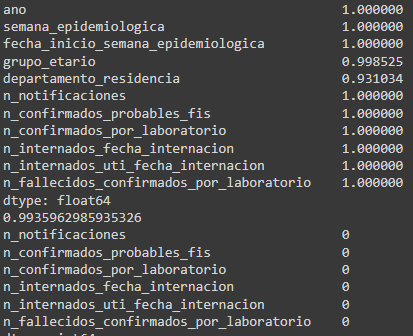

Las columnas "grupo_etario" y "detartamento_residencia" están por debajo de un 100% de integridad/completitud, es decIr que hay valores faltantes, y aquellas columnas son importantes para nuestro análisis.
Y en total nuestro dataset tiene un 0.9935962985935326% de integridad/completitud.
Y las columnas que no deberían tener números negativos cumplen.








# **6. Análisis Exploratorio (EDA)**




## Visualización mediante gráficos



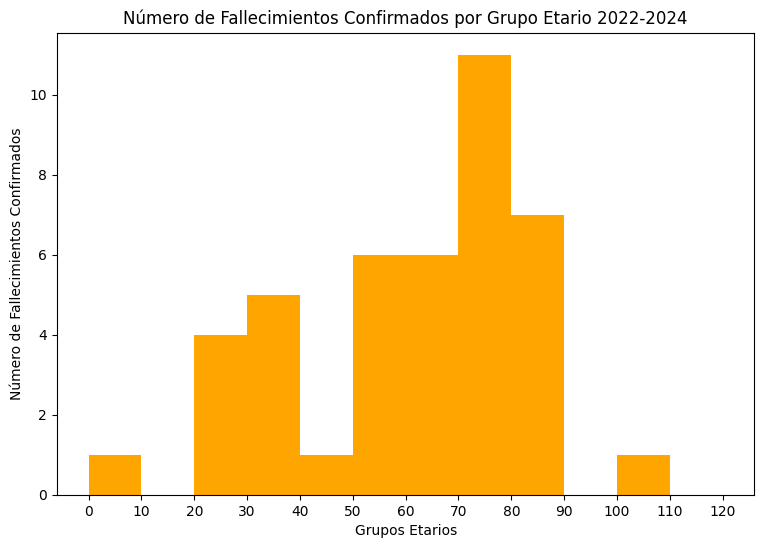

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def grafico_barras_grupo_etario(caracteristica, etiqueta_Y, titulo):
  df_agrupado = datasetDengueFrame.groupby("grupo_etario").agg({caracteristica : sum
  }).reset_index()
  plt.figure(figsize=(12,6))
  plt.bar(df_agrupado['grupo_etario'], df_agrupado[caracteristica], color='orange')
  plt.xlabel('Grupo etario')
  plt.ylabel(etiqueta_Y)
  plt.title(titulo)

  plt.show()

#grafico_barras_grupo_etario('n_fallecidos_confirmados_por_laboratorio','N° Fallecimientos','Número de fallecimientos por grupo etario')

PRUEBA = pd.read_csv("/content/2024-06-17-output.csv", sep=";")
#"Reemplazar en el codigo prueba por -> datasetDengueFrame"

# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(9, 6))

# Definir las posiciones de las barras y sus etiquetas
df_agrupado = PRUEBA.groupby('grupo_etario').agg({
    'n_fallecidos_confirmados_por_laboratorio': 'sum' }).reset_index()
df_agrupado['lower_bound'] = df_agrupado['grupo_etario'].apply(lambda x: int(x.split(',')[0][1:]))
df_agrupado = df_agrupado.sort_values('lower_bound')

x_labels = np.arange(0, 130, 10)  # Etiquetas de los límites del eje X
bar_positions = df_agrupado['lower_bound'] + 5  # Posicionar las barras en el centro de cada rango

# Crear el gráfico de barras
bars = ax.bar(bar_positions, df_agrupado['n_fallecidos_confirmados_por_laboratorio'], width=10, align='center', color='orange')


ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels)

ax.set_xlabel('Grupos Etarios')
ax.set_ylabel('Número de Fallecimientos Confirmados')
ax.set_title('Número de Fallecimientos Confirmados por Grupo Etario 2022-2024')

plt.show()

    ano  semana_epidemiologica fecha_inicio_semana_epidemiologica  \
0  2022                     27                         2022-07-03   
1  2022                     28                         2022-07-10   
2  2022                     28                         2022-07-10   
3  2022                     28                         2022-07-10   
4  2022                     31                         2022-07-31   

  grupo_etario departamento_residencia  n_notificaciones  \
0      [40,50)               COMUNA 15                 1   
1      [50,60)               COMUNA 15                 1   
2      [20,30)                COMUNA 5                 1   
3      [40,50)                COMUNA 7                 1   
4      [30,40)                COMUNA 6                 1   

   n_confirmados_probables_fis  n_confirmados_por_laboratorio  \
0                            0                              0   
1                            0                              0   
2                            

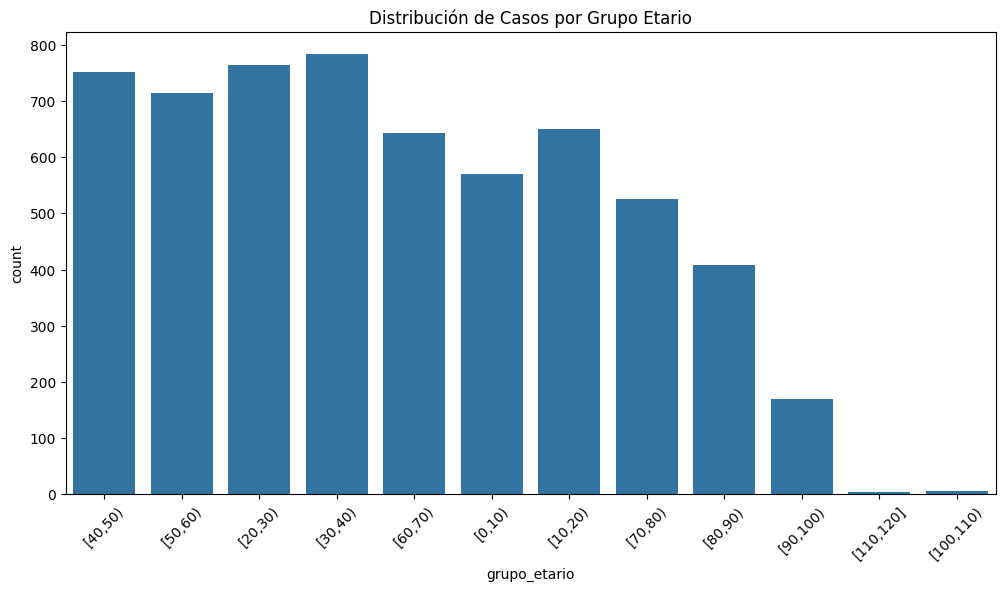

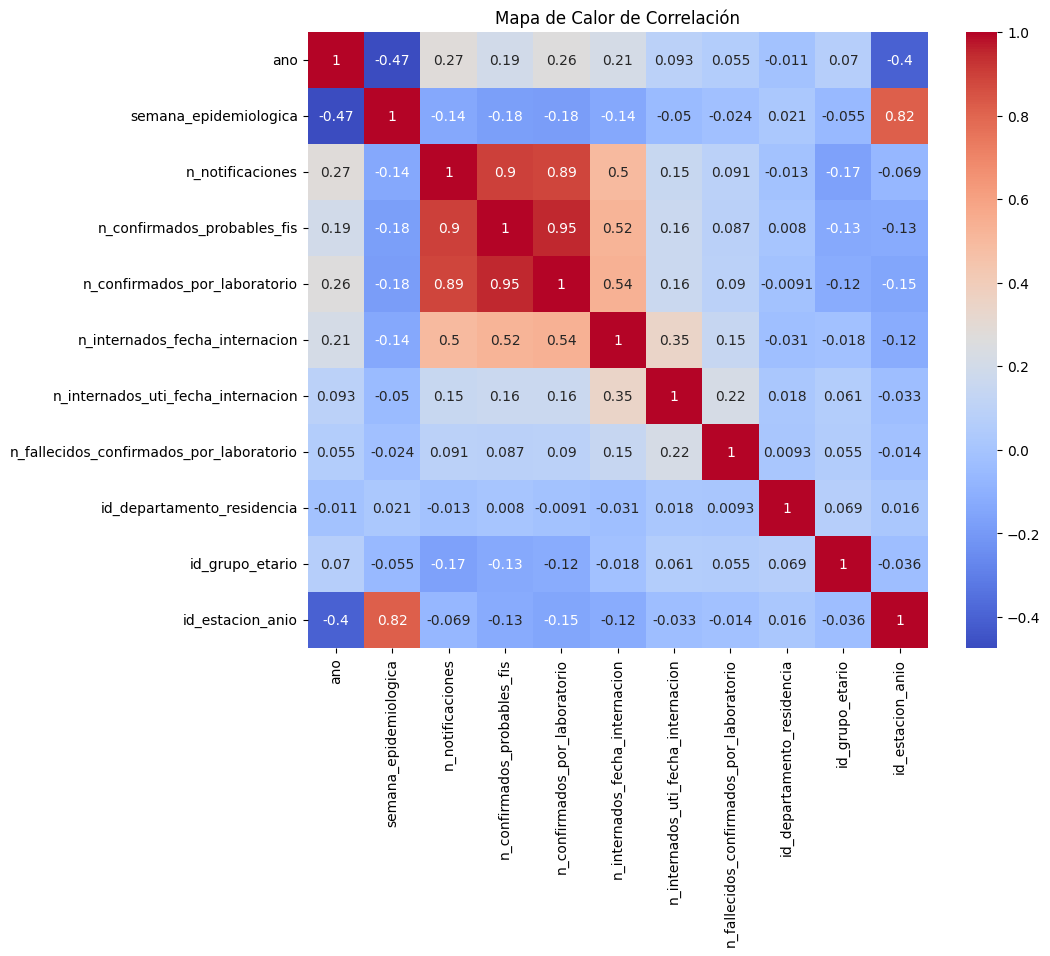

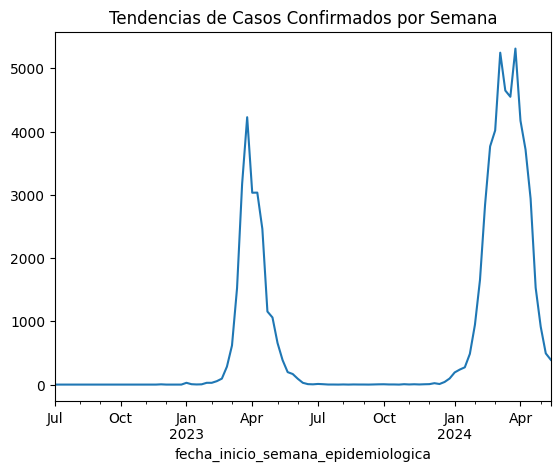

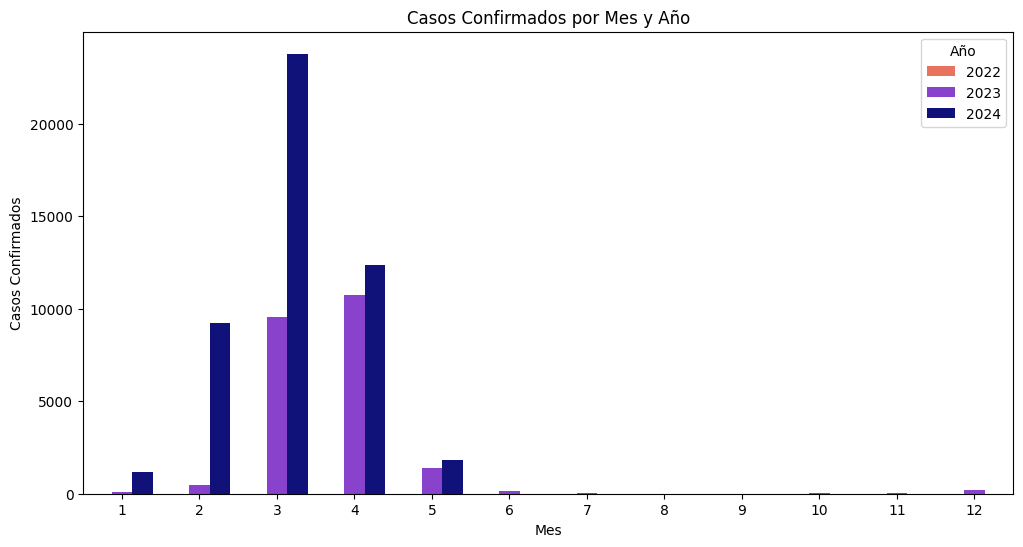

Index(['ano', 'semana_epidemiologica', 'grupo_etario',
       'departamento_residencia', 'n_notificaciones',
       'n_confirmados_probables_fis', 'n_confirmados_por_laboratorio',
       'n_internados_fecha_internacion', 'n_internados_uti_fecha_internacion',
       'n_fallecidos_confirmados_por_laboratorio',
       'clasificacion_grupo_etario', 'estacion_anio',
       'id_departamento_residencia', 'id_grupo_etario', 'id_estacion_anio',
       'n_confirmados_total', 'mes', 'año'],
      dtype='object')


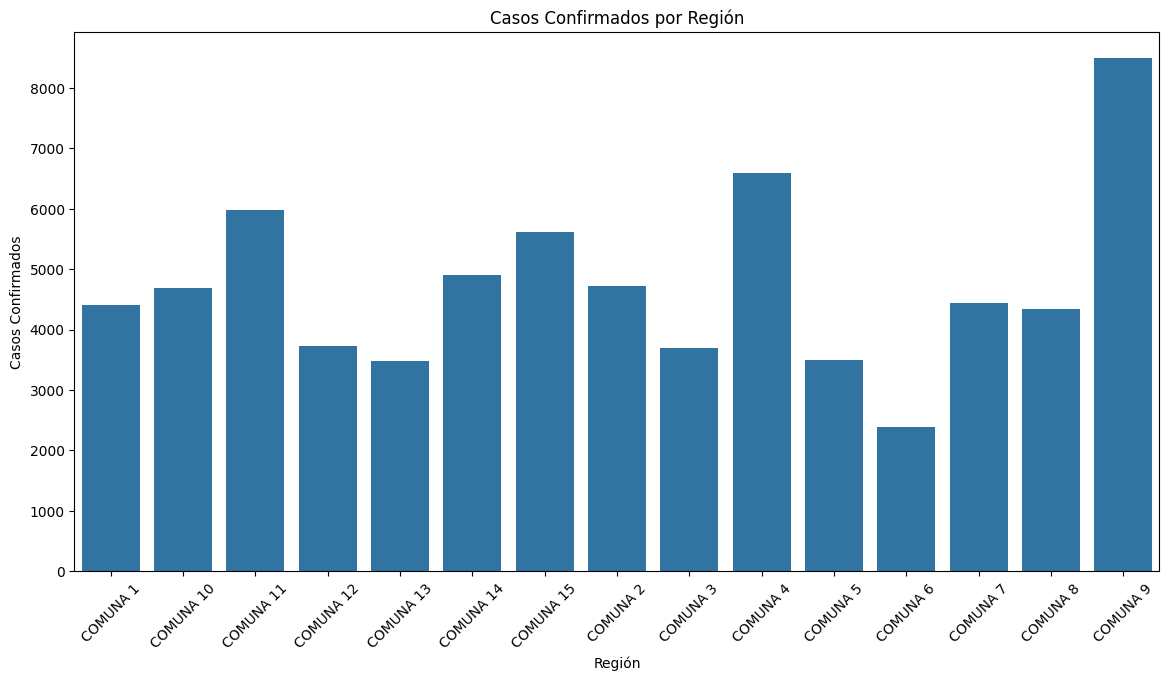

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = '/content/2024-06-17-output.csv'
data = pd.read_csv(url, delimiter=';')

# Mostrar las primeras filas del dataset
print(data.head())
# Verificar las columnas en el DataFrame
print(data.columns)

# Distribución de casos por grupo etario
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.countplot(data=data, x='grupo_etario')
plt.title('Distribución de Casos por Grupo Etario')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

# Mapa de calor de correlación
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()



# Tendencias temporales
data['fecha_inicio_semana_epidemiologica'] = pd.to_datetime(data['fecha_inicio_semana_epidemiologica'])
data.set_index('fecha_inicio_semana_epidemiologica', inplace=True)

# Casos confirmados por semana
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']
weekly_cases = data.resample('W').sum()['n_confirmados_total']
weekly_cases.plot()
plt.title('Tendencias de Casos Confirmados por Semana')
plt.show()

# Casos confirmados por mes y año
# Calcular casos confirmados totales
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']

# Extraer mes y año de la columna de fecha (asegurarse de que las columnas ya existen)
data['mes'] = data.index.month
data['año'] = data.index.year

# Agrupar por mes y año y sumar los casos confirmados
monthly_cases = data.groupby(['año', 'mes']).sum()['n_confirmados_total'].reset_index()

# Crear un gráfico de barras para mostrar los casos por mes y año con colores personalizados
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='n_confirmados_total', hue='año', data=monthly_cases, palette=['#FF6347', '#8A2BE2', '#00008B'])
plt.title('Casos Confirmados por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.legend(title='Año')
plt.show()

# Analizar los datos por Comuna
# Verificar las columnas en el DataFrame
print(data.columns)

# Agrupar por región y sumar los casos confirmados
region_cases = data.groupby('departamento_residencia').sum()['n_confirmados_total'].reset_index()

# Crear un gráfico de barras para mostrar los casos confirmados por región
plt.figure(figsize=(14, 7))
sns.barplot(x='departamento_residencia', y='n_confirmados_total', data=region_cases)
plt.title('Casos Confirmados por Región')
plt.xlabel('Región')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.show()




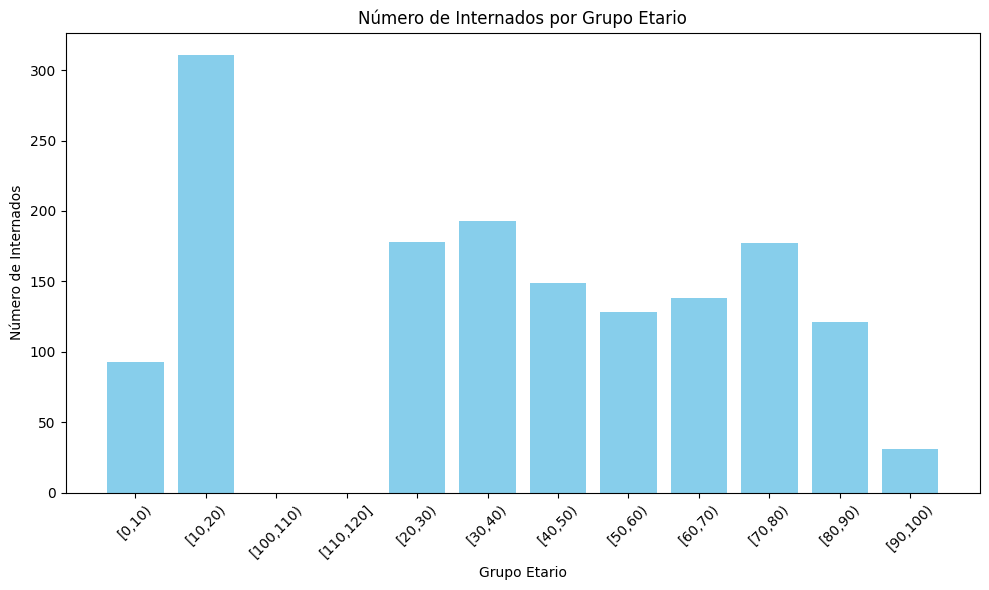

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset
file_path = '/content/2024-06-04-output.csv'
data = pd.read_csv(file_path, delimiter=';')

# Filtrar las columnas relevantes
data_filtered = data[['grupo_etario', 'n_internados_fecha_internacion']]

# Agrupar por grupo etario y sumar los internados
grouped_data = data_filtered.groupby('grupo_etario').sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['n_internados_fecha_internacion'], color='skyblue')
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Internados')
plt.title('Número de Internados por Grupo Etario')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Gráficos respecto a que las condiciones meteorológicas son un factor importante en la transmisión del dengue. Se pueden dar las condiciones más favorables para la reproducción y el desarrollo del mosquito y por ende la propagación de la enfermedad.

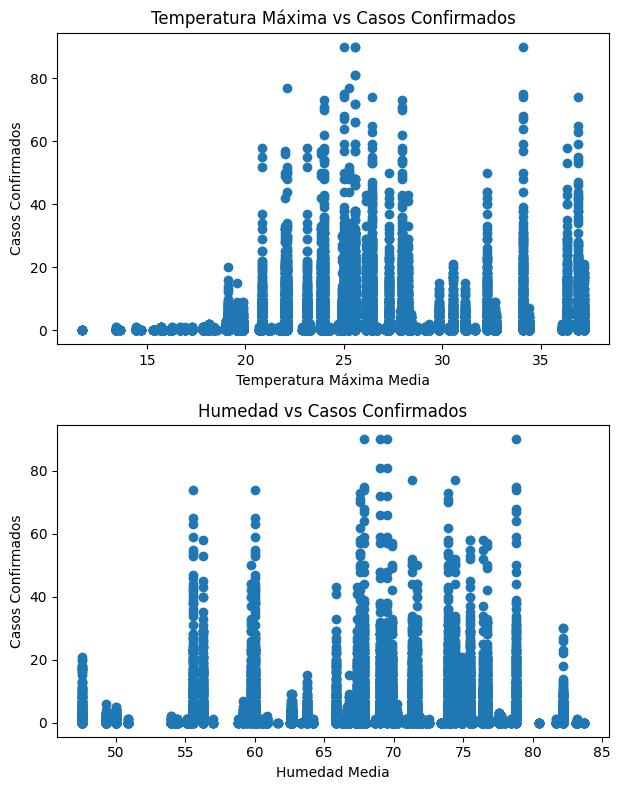

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_clima = pd.read_csv('/content/datos_meteorologicos_caba.csv', delimiter=';')
df_dengue = pd.read_csv('/content/2024-06-17-output.csv', delimiter=';')


# Unir los conjuntos de datos en función de la semana epidemiológica
df_merged = pd.merge(df_clima, df_dengue, left_on='Numero_Semana', right_on='semana_epidemiologica', how='inner')

# Graficar la relación entre las condiciones climáticas y los casos de dengue
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df_merged['Temperatura_Maxima_Media'], df_merged['n_confirmados_por_laboratorio'])
plt.title('Temperatura Máxima vs Casos Confirmados')
plt.xlabel('Temperatura Máxima Media')
plt.ylabel('Casos Confirmados')

plt.subplot(2, 2, 3)
plt.scatter(df_merged['Humedad_Media'], df_merged['n_confirmados_por_laboratorio'])
plt.title('Humedad vs Casos Confirmados')
plt.xlabel('Humedad Media')
plt.ylabel('Casos Confirmados')


plt.tight_layout()
plt.show()

<ipython-input-29-e4d65e6c4779>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dengue_year['Mes'] = pd.to_datetime(data_dengue_year['fecha_inicio_semana_epidemiologica']).dt.strftime('%B')


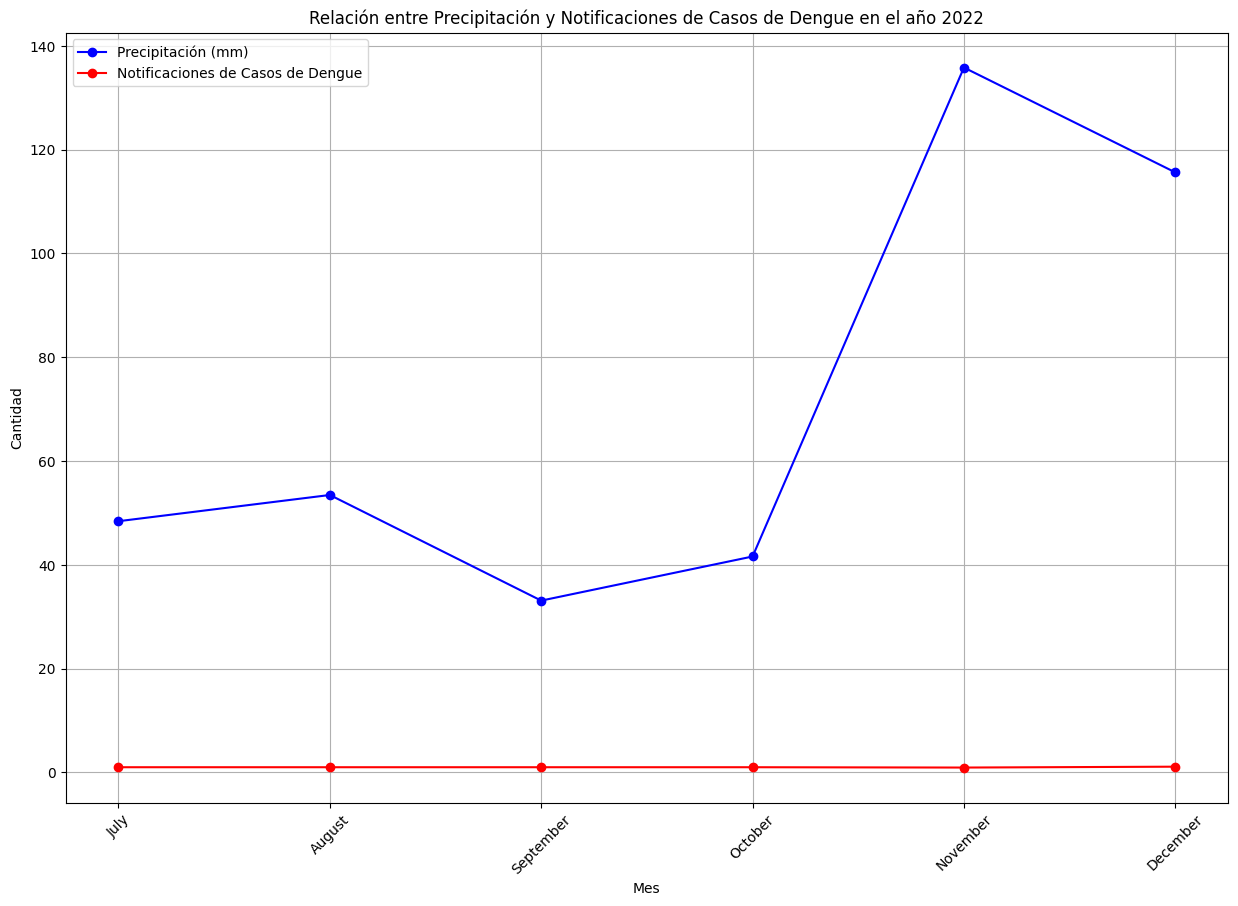

<ipython-input-29-e4d65e6c4779>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dengue_year['Mes'] = pd.to_datetime(data_dengue_year['fecha_inicio_semana_epidemiologica']).dt.strftime('%B')


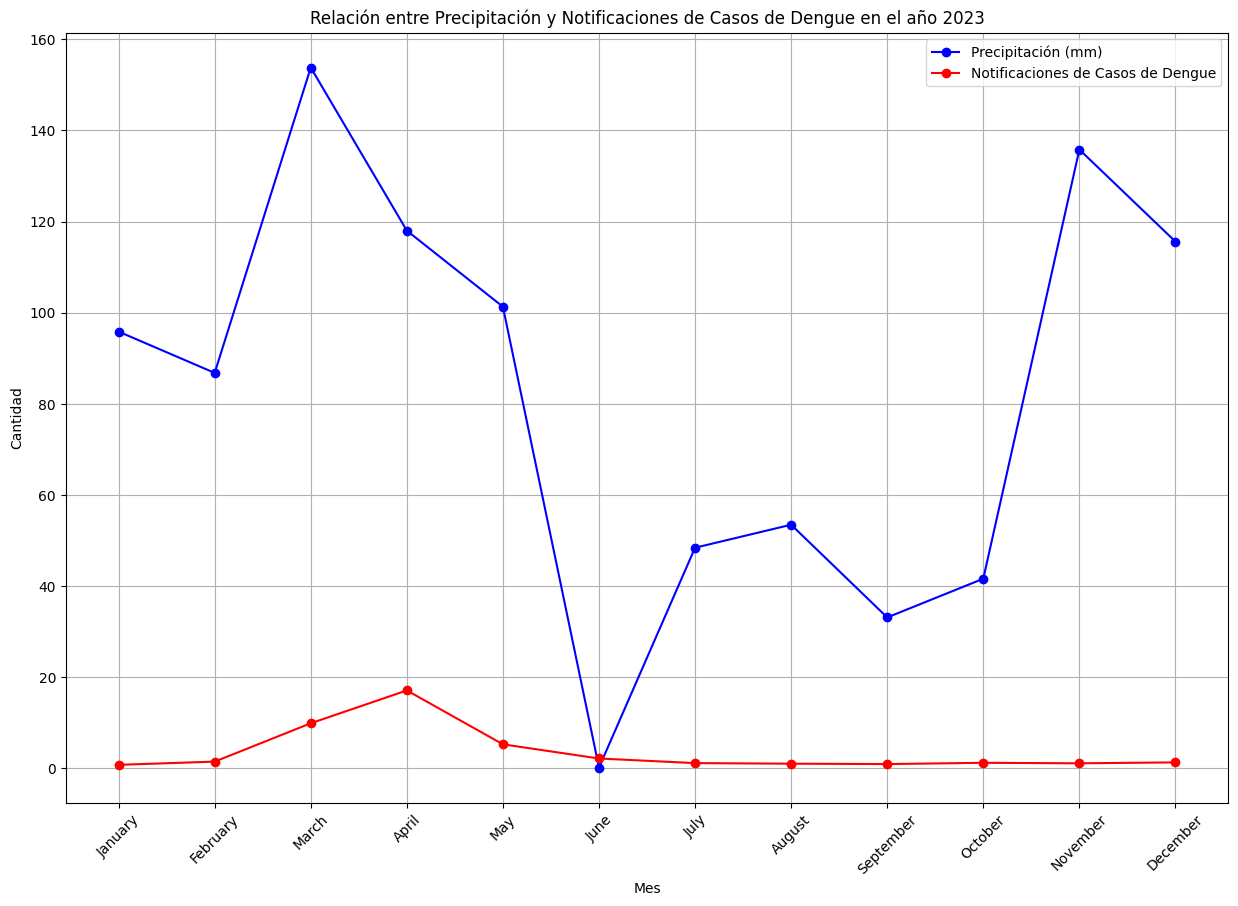

<ipython-input-29-e4d65e6c4779>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dengue_year['Mes'] = pd.to_datetime(data_dengue_year['fecha_inicio_semana_epidemiologica']).dt.strftime('%B')


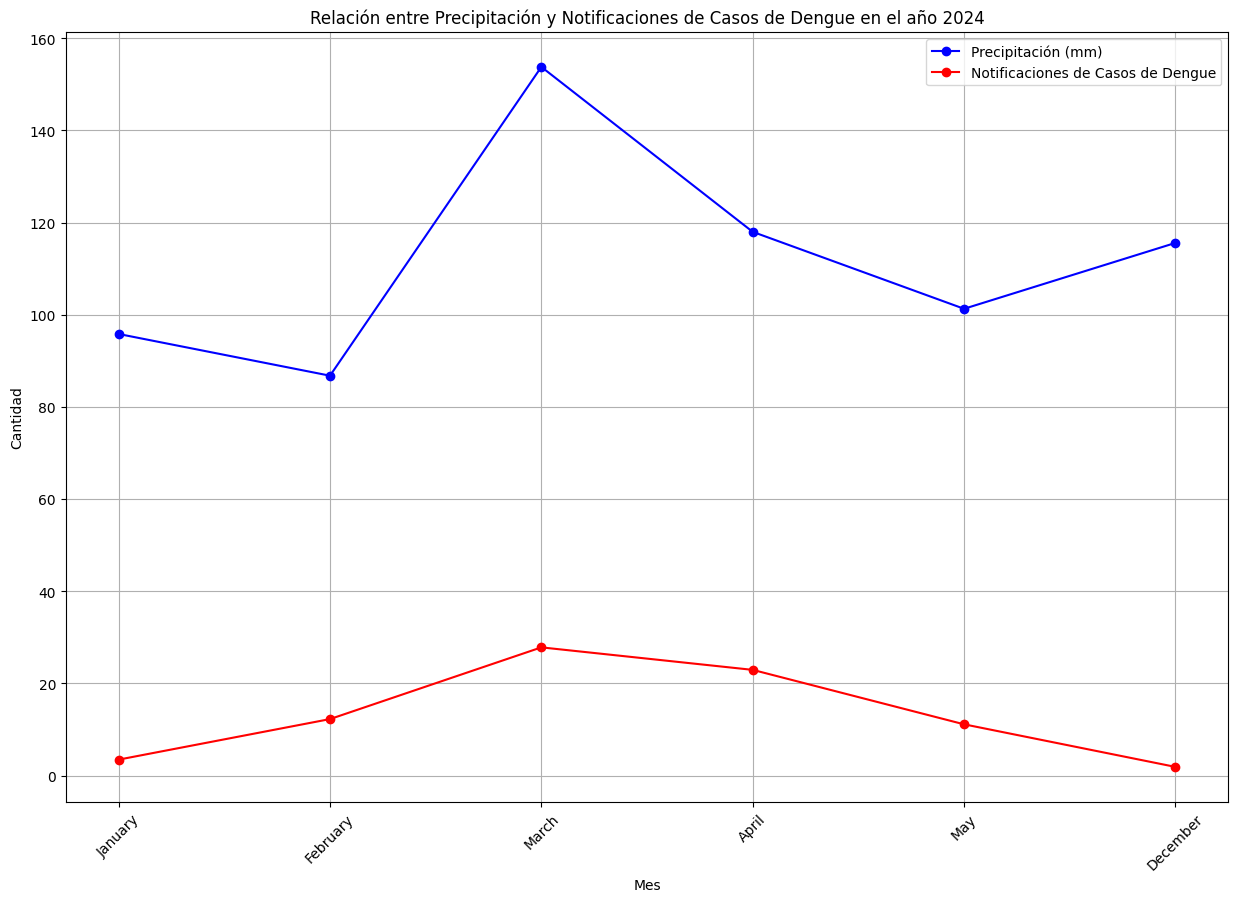

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_precipitation_dengue_relation(data_dengue_path, data_precipitation_path, year):
    # Carga de los datasets
    data_dengue = pd.read_csv(data_dengue_path, delimiter=';')
    data_precipitation = pd.read_csv(data_precipitation_path, delimiter=';')

    # Filtrar los datos para el año especificado
    data_dengue_year = data_dengue[data_dengue['ano'] == year]

    # Convertir las precipitaciones a tipo numérico y reemplazar comas por puntos
    data_precipitation['Precipitacion'] = data_precipitation['Precipitacion'].str.replace(',', '.').astype(float)

    # Extraer el mes de la fecha de inicio de la semana epidemiológica
    data_dengue_year['Mes'] = pd.to_datetime(data_dengue_year['fecha_inicio_semana_epidemiologica']).dt.strftime('%B')

    # Fusionar los datasets por mes
    merged_data = pd.merge(data_dengue_year, data_precipitation, on=['Mes'])

    # Calcular la media de las precipitaciones y de los casos de dengue
    aggregated_data = merged_data.groupby('Mes').agg({'Precipitacion': 'mean', 'n_notificaciones': 'mean'}).reset_index()

    # Especificar el orden de los meses
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Convertir el mes a tipo categórico con el orden deseado
    aggregated_data['Mes'] = pd.Categorical(aggregated_data['Mes'], categories=months_order, ordered=True)

    # Ordenar los datos por el orden de los meses
    aggregated_data = aggregated_data.sort_values('Mes')

    # Crear el gráfico de líneas
    plt.figure(figsize=(15, 10))

    # Graficar la precipitación
    plt.plot(aggregated_data['Mes'], aggregated_data['Precipitacion'], marker='o', color='blue', label='Precipitación (mm)')

    # Graficar los casos de dengue
    plt.plot(aggregated_data['Mes'], aggregated_data['n_notificaciones'], marker='o', color='red', label='Notificaciones de Casos de Dengue')

    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.title(f'Relación entre Precipitación y Notificaciones de Casos de Dengue en el año {year}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Uso de la función
plot_precipitation_dengue_relation("/content/2024-06-17-output.csv", "/content/precipitaciones_mensuales_caba.csv", 2022)
plot_precipitation_dengue_relation("/content/2024-06-17-output.csv", "/content/precipitaciones_mensuales_caba.csv", 2023)
plot_precipitation_dengue_relation("/content/2024-06-17-output.csv", "/content/precipitaciones_mensuales_caba.csv", 2024)


## Visualización mediante mapas


Haciendo uso de la columna departamento_residencia podemos graficar distintas caracteristicas del dataset en un mapa de la Ciudad Autónoma de Buenos Aires. Para eso descargamos un geoJSON con información geografica de las comunas y con GeoPandas creamos un dataframe.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# https://data.buenosaires.gob.ar/dataset/comunas/resource/b0b627ac-5b47-4574-89ac-6999b63598ee

# Carga del archivo GeoJSON
gdf_comunas = gpd.read_file("/content/comunas_Buenos_Aires.geojson")

gdf_comunas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         15 non-null     int64   
 1   OBJETO     15 non-null     object  
 2   COMUNAS    15 non-null     float64 
 3   BARRIOS    15 non-null     object  
 4   PERIMETRO  15 non-null     float64 
 5   AREA       15 non-null     float64 
 6   geometry   15 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 968.0+ bytes


Para utilizar la información del dataset de dengue, realizamos un merge de los dataFrames mediante la comuna.

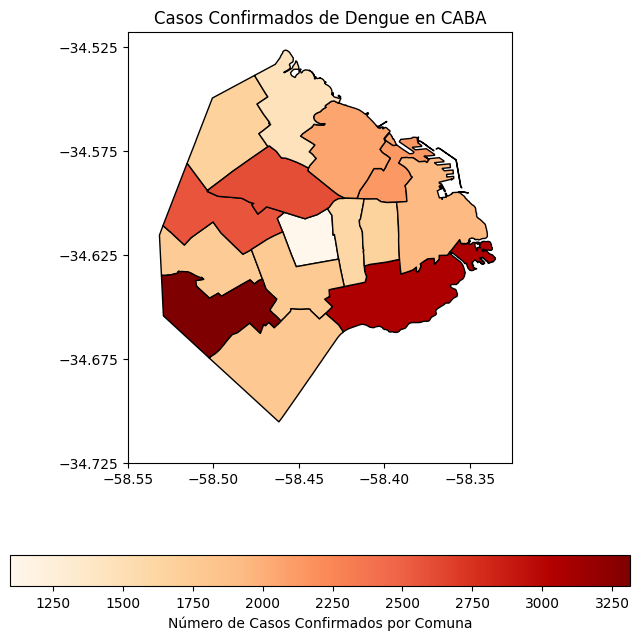

In [ ]:

#Para crear graficos evaluando como varian distintas caracteristicas entre comunas, se
#crea un dataframe donde se agrupan los registros del dataset de acuerdo al departamento_residencia

#modificamos la columna para que coincida el formato con COMUNAS del geoDataFrame



def grafico_por_comuna(caracteristica, gdf, etiqueta, titulo):
  df_agrupado = datasetDengueFrame.groupby('departamento_residencia').agg({
      caracteristica : 'sum' }).reset_index()
  df_agrupado['departamento_residencia'] = df_agrupado['departamento_residencia'].str.replace('COMUNA ', '').astype(float)
  gdf = gdf.merge(df_agrupado, left_on='COMUNAS', right_on='departamento_residencia')

  fig, ax = plt.subplots(figsize=(8, 8))
  gdf.plot(column= caracteristica , cmap='OrRd', ax=ax, legend=True, edgecolor='black',
              legend_kwds={'label': etiqueta,
                           'orientation': "horizontal"})
  ax.set_title(titulo)
  #ax.set_axis_off() #podemos sacar directamente los ejes
  x_ticks = ax.get_xticks() #para reducir la cantidad de numeros en los ejes, sino se superponen
  y_ticks = ax.get_yticks()
  ax.set_xticks(x_ticks[::2])
  ax.set_yticks(y_ticks[::2])

  plt.show()

grafico_por_comuna('n_confirmados_por_laboratorio', gdf_comunas, 'Número de Casos Confirmados por Comuna', 'Casos Confirmados de Dengue en CABA')



# **7. Procesamiento con Algoritmo de Machine Learning**



Estudio con machine learning
Buscaremos predecir:
- cantidad de casos en una comuna en una semana especifica
- numero de casos confirmados por laboratorio en una semana en especifico
- predecir la cantidad de casos en una determinada semana para una comuna específica.


In [ ]:
#es el que va!
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Cargar el dataset con el delimitador correcto
url = '/content/2024-06-17-output.csv'  # Reemplaza con la ruta real de tu archivo
data = pd.read_csv(url, delimiter=';')

# Verificar los nombres de las columnas
print(data.columns)

# Convertir las columnas 'estacion_anio', 'clasificacion_grupo_etario', 'grupo_etario' y 'departamento_residencia' en valores numéricos
label_encoder_estacion = LabelEncoder()
data['estacion_anio'] = label_encoder_estacion.fit_transform(data['estacion_anio'])

label_encoder_clasificacion = LabelEncoder()
data['clasificacion_grupo_etario'] = label_encoder_clasificacion.fit_transform(data['clasificacion_grupo_etario'])

label_encoder_grupo_etario = LabelEncoder()
data['grupo_etario'] = label_encoder_grupo_etario.fit_transform(data['grupo_etario'])

label_encoder_departamento = LabelEncoder()
data['departamento_residencia'] = label_encoder_departamento.fit_transform(data['departamento_residencia'])

# Verificar las conversiones
print(data['estacion_anio'].unique())
print(data['clasificacion_grupo_etario'].unique())
print(data['grupo_etario'].unique())
print(data['departamento_residencia'].unique())
print("lebel encoder: ", label_encoder_grupo_etario )

# Separar las características (X) y el objetivo (y)
X = data.drop(columns=['n_confirmados_por_laboratorio','fecha_inicio_semana_epidemiologica'])
y = data['n_confirmados_por_laboratorio']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numeric_features = X.select_dtypes(include=['number']).columns

# Crear transformadores para las columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear y entrenar el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=80))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Evaluar el modelo:")
print(confusion_matrix(y_test, y_pred))
print("Clasification report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Preparar nuevos datos de entrada para predicciones
def preparar_datos_prediccion(ano, semana_epidemiologica, fecha_inicio, grupo_etario, departamento, n_notificaciones, n_probables_fis, n_internados, n_internados_uti, n_fallecidos, clasificacion, estacion):
    return pd.DataFrame({
        'ano': [ano],
        'semana_epidemiologica': [semana_epidemiologica],
        'fecha_inicio_semana_epidemiologica': [fecha_inicio],
        'grupo_etario': label_encoder_grupo_etario.transform([grupo_etario]),
        'departamento_residencia': label_encoder_departamento.transform([departamento]),
        'n_notificaciones': [n_notificaciones],
        'n_confirmados_probables_fis': [n_probables_fis],
        'n_internados_fecha_internacion': [n_internados],
        'n_internados_uti_fecha_internacion': [n_internados_uti],
        'n_fallecidos_confirmados_por_laboratorio': [n_fallecidos],
        'clasificacion_grupo_etario': label_encoder_clasificacion.transform([clasificacion]),
        'estacion_anio': label_encoder_estacion.transform([estacion]),
        'id_departamento_residencia': 0,  # Añadir valor predeterminado para id
        'id_grupo_etario': 0,             # Añadir valor predeterminado para id
        'id_estacion_anio': 0             # Añadir valor predeterminado para id
    })

# Ejemplo de predicción
nuevos_datos = preparar_datos_prediccion(
    ano=2024,
    semana_epidemiologica=30,
    fecha_inicio='2024-07-20',
    grupo_etario='[30,40)',
    departamento='COMUNA 10',
    n_notificaciones=1,
    n_probables_fis=0,
    n_internados=0,
    n_internados_uti=0,
    n_fallecidos=0,
    clasificacion='juventud',
    estacion='Invierno'
)

# Hacer predicciones
predicciones = model.predict(nuevos_datos)

# Ver las predicciones
print("Predicciones:", predicciones)


Index(['ano', 'semana_epidemiologica', 'fecha_inicio_semana_epidemiologica',
       'grupo_etario', 'departamento_residencia', 'n_notificaciones',
       'n_confirmados_probables_fis', 'n_confirmados_por_laboratorio',
       'n_internados_fecha_internacion', 'n_internados_uti_fecha_internacion',
       'n_fallecidos_confirmados_por_laboratorio',
       'clasificacion_grupo_etario', 'estacion_anio',
       'id_departamento_residencia', 'id_grupo_etario', 'id_estacion_anio'],
      dtype='object')
[0 2 3 1]
[1 3 2 0 4]
[ 6  7  4  5  8  0  1  9 10 11  3  2]
[ 6 10 12 11  5  2  9  0  1  7 13 14  8  3  4]
lebel encoder:  LabelEncoder()
Evaluar el modelo:
[[343  55   9 ...   0   0   0]
 [ 21 157  20 ...   0   0   0]
 [  2  30  46 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]]
Clasification report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       410
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Mean Squared Error: 7.478294808744008
R² Score: 0.8909553033624253
Predicción de casos confirmados por laboratorio para la semana 25: 41.362859557280444


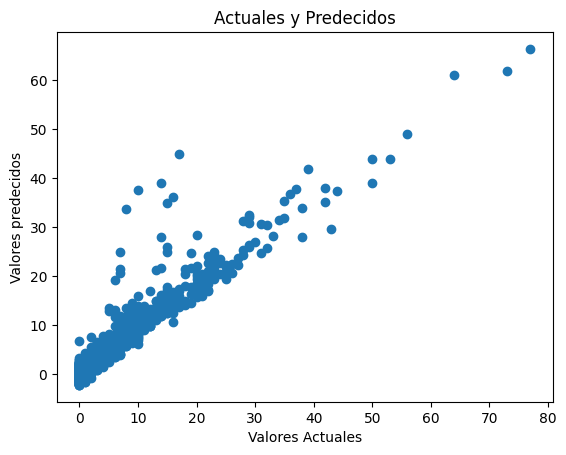

In [ ]:
#Probando lo mismo que arriba pero usando regresion para predecir una cantidad de confirmados por laboratorio

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Cargar los datos
data = pd.read_csv('/content/2024-06-17-output.csv', delimiter=';')  # Reemplaza con la ruta a tu archivo CSV

# Seleccionar las características y la variable objetivo
X = data[['ano', 'semana_epidemiologica', 'grupo_etario', 'departamento_residencia', 'n_notificaciones', 'n_confirmados_probables_fis', 'n_internados_fecha_internacion', 'n_internados_uti_fecha_internacion', 'n_fallecidos_confirmados_por_laboratorio', 'estacion_anio']]
y = data['n_confirmados_por_laboratorio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Codificación de variables categóricas
categorical_features = ['grupo_etario', 'departamento_residencia', 'estacion_anio']
numerical_features = ['ano', 'semana_epidemiologica', 'n_notificaciones', 'n_confirmados_probables_fis', 'n_internados_fecha_internacion', 'n_internados_uti_fecha_internacion', 'n_fallecidos_confirmados_por_laboratorio']

# Preprocesamiento: Pipeline para manejar las características categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


# Hacer una predicción para una semana epidemiológica específica (por ejemplo, semana 25)
semana_prediccion = 25
entrada_prediccion = {
    'ano': 2024,  # Año correspondiente
    'semana_epidemiologica': semana_prediccion,
    'grupo_etario': '[10,20)',  # Grupo etario correspondiente
    'departamento_residencia': 'COMUNA 10',  # Departamento correspondiente
    'n_notificaciones': 100,  # Número de notificaciones correspondiente
    'n_confirmados_probables_fis': 50,  # Número de confirmados probables físicos correspondiente
    'n_internados_fecha_internacion': 10,  # Número de internados a fecha de internación correspondiente
    'n_internados_uti_fecha_internacion': 5,  # Número de internados en UTI a fecha de internación correspondiente
    'n_fallecidos_confirmados_por_laboratorio': 2,  # Número de fallecidos confirmados por laboratorio correspondiente
    'estacion_anio': 'Otonio'  # Estación del año correspondiente
}

# Convertir los datos de entrada en un DataFrame (solo un ejemplo, ajusta según tus datos)
entrada_prediccion_df = pd.DataFrame([entrada_prediccion])

# Hacer la predicción utilizando el modelo entrenado
prediccion = model.predict(entrada_prediccion_df)

print(f'Predicción de casos confirmados por laboratorio para la semana {semana_prediccion}: {prediccion[0]}')


# Opcional: Visualización de resultados
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores predecidos')
plt.title('Actuales y Predecidos')
plt.show()

In [ ]:
#Intentando probar clasificacion para predecir si una persona se infectara o no.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar los datos
data = pd.read_csv('/content/2024-06-04-output.csv', delimiter=';')  # Reemplaza con la ruta a tu archivo CSV


# Crear columna 'enfermo' basada en la condición
data['enfermo'] = data['n_confirmados_por_laboratorio'].apply(lambda x: 'si' if x > 0 else 'no')

# Seleccionar las características y la variable objetivo
X = data[['semana_epidemiologica', 'grupo_etario', 'departamento_residencia', 'estacion_anio']]
y = data['enfermo']

# Preprocesamiento: Codificación de variables categóricas
categorical_features = ['grupo_etario', 'departamento_residencia', 'estacion_anio']
numerical_features = ['semana_epidemiologica']

# Preprocesamiento: Pipeline para manejar las características categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear un pipeline que primero preprocesa los datos y luego aplica el modelo de clasificación
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())  # Utilizamos regresión logística como ejemplo
])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Ejemplo de predicción para una nueva instancia
nueva_instancia = {
    'semana_epidemiologica': 25,
    'grupo_etario': '[50,60)',
    'departamento_residencia': 'COMUNA 11',
    'estacion_anio': 'Otonio'
}

# Convertir los datos de entrada en un DataFrame para la predicción
entrada_prediccion_df = pd.DataFrame([nueva_instancia])

# Hacer la predicción utilizando el modelo entrenado
prediccion = model.predict(entrada_prediccion_df)

print(f'Predicción de enfermo/no enfermo: {prediccion[0]}')


Precisión del modelo: 0.7643253234750462
              precision    recall  f1-score   support

          no       0.87      0.36      0.51       368
          si       0.75      0.97      0.84       714

    accuracy                           0.76      1082
   macro avg       0.81      0.67      0.68      1082
weighted avg       0.79      0.76      0.73      1082

Predicción de enfermo/no enfermo: si


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Predecir la probabilidad de contraer dengue en una zona específica**

Crear la columna n_confirmados_total

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
url = '/content/2024-06-17-output.csv'  # Cambia esta línea con la ruta a tu archivo CSV
data = pd.read_csv(url, delimiter=';')

# Asegurarse de que la columna de fecha esté en el formato datetime
data['fecha_inicio_semana_epidemiologica'] = pd.to_datetime(data['fecha_inicio_semana_epidemiologica'])
data.set_index('fecha_inicio_semana_epidemiologica', inplace=True)

# Crear la columna 'n_confirmados_total'
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']

# Verificar que la columna se haya creado correctamente
print(data[['n_confirmados_probables_fis', 'n_confirmados_por_laboratorio', 'n_confirmados_total']].head())


                                    n_confirmados_probables_fis  \
fecha_inicio_semana_epidemiologica                                
2022-07-03                                                    0   
2022-07-10                                                    0   
2022-07-10                                                    0   
2022-07-10                                                    0   
2022-07-31                                                    0   

                                    n_confirmados_por_laboratorio  \
fecha_inicio_semana_epidemiologica                                  
2022-07-03                                                      0   
2022-07-10                                                      0   
2022-07-10                                                      0   
2022-07-10                                                      0   
2022-07-31                                                      0   

                                    n_confirma

 Preparar los datos para Machine Learning

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       329
           1       0.73      1.00      0.84       870

    accuracy                           0.73      1199
   macro avg       0.86      0.50      0.42      1199
weighted avg       0.80      0.73      0.61      1199

Accuracy del modelo: 0.725604670558799
   departamento_residencia  probabilidad_dengue
0                COMUNA 15             0.714962
1                 COMUNA 5             0.689028
2                 COMUNA 7             0.693685
3                 COMUNA 6             0.663710
4                COMUNA 14             0.748325
5                COMUNA 11             0.760744
6                 COMUNA 4             0.718159
7                 COMUNA 1             0.697929
8                COMUNA 10             0.762958
9                 COMUNA 2             0.714430
10                COMUNA 8             0.723636
11                COMUNA 9             0.727582
12        

<ipython-input-19-e2caa6e84dd2>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departamento_residencia', y='probabilidad_dengue', data=departamentos, palette='viridis')


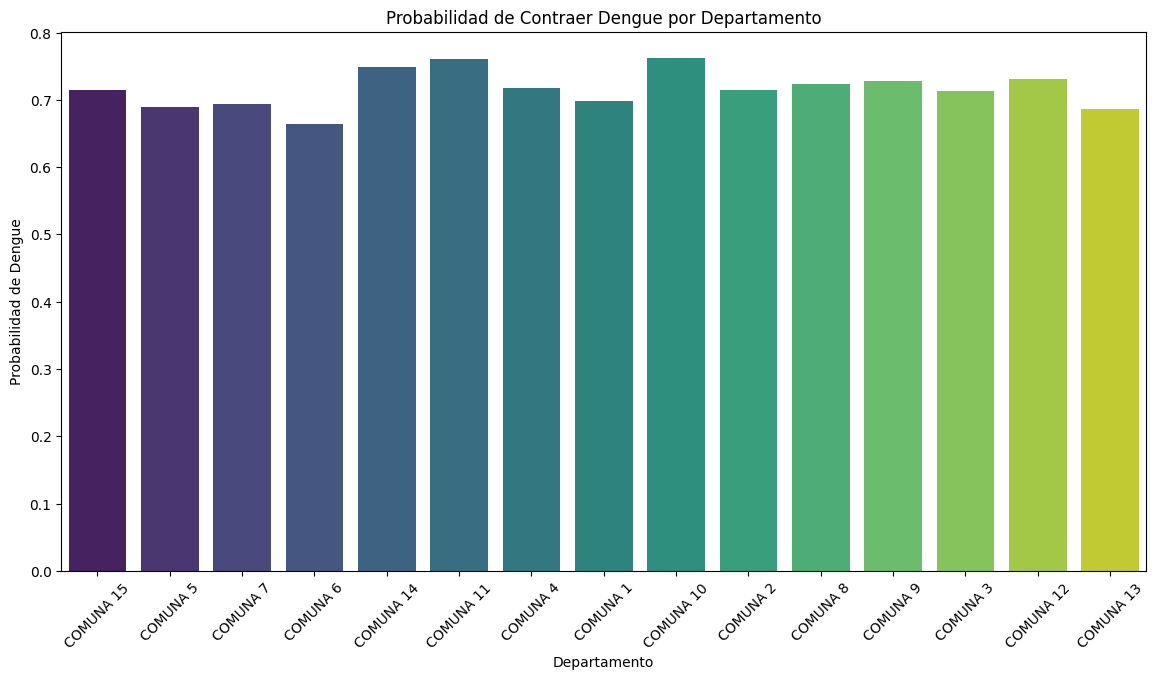

In [ ]:
# Seleccionar las columnas relevantes y hacer una copia
data_ml = data[['departamento_residencia', 'n_confirmados_total']].copy()

# Crear una columna binaria objetivo
data_ml['dengue'] = (data_ml['n_confirmados_total'] > 0).astype(int)

# Definir las características (X) y la variable objetivo (y)
X = data_ml[['departamento_residencia']]
y = data_ml['dengue']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: OneHotEncoding para la columna categórica 'departamento_residencia'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['departamento_residencia'])
    ])

# Crear un pipeline con preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

# Calcular y mostrar el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

# Predecir la probabilidad de contraer dengue para cada departamento
departamentos = pd.DataFrame({'departamento_residencia': data['departamento_residencia'].unique()})
departamentos['probabilidad_dengue'] = model.predict_proba(departamentos)[:, 1]

# Mostrar las predicciones
print(departamentos)

# Visualizar las predicciones
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x='departamento_residencia', y='probabilidad_dengue', data=departamentos, palette='viridis')
plt.title('Probabilidad de Contraer Dengue por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Probabilidad de Dengue')
plt.xticks(rotation=45)
plt.show()


Random Forest Classifier:

El Random Forest es un conjunto de árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos. Los resultados de estos árboles se promedian para mejorar la precisión de la predicción y controlar el sobreajuste. Este algoritmo es robusto y eficaz para tareas de clasificación y regresión.
En el código, se utiliza RandomForestClassifier de sklearn.ensemble.
OneHotEncoder:

Dado que la característica departamento_residencia es categórica, se usa OneHotEncoder para convertir esta columna en una representación numérica que puede ser procesada por el algoritmo de machine learning.
OneHotEncoder crea una nueva columna binaria para cada categoría única en la columna original.
Pipeline:

Se utiliza un Pipeline de sklearn.pipeline para encadenar el preprocesamiento (OneHotEncoding) y el modelo de clasificación (Random Forest) en un solo paso, facilitando la organización del código y asegurando que todas las transformaciones necesarias se apliquen de manera correcta y consistente durante el entrenamiento y las predicciones.

**Predecir el mes más probable para contraer

1.   Elemento de la lista
2.   Elemento de la lista

dengue**

Preparar los datos

Crear las columnas mes y año

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
url = '/content/2024-06-17-output.csv'  # Cambia esta línea con la ruta a tu archivo CSV
data = pd.read_csv(url, delimiter=';')

# Asegurarse de que la columna de fecha esté en el formato datetime
data['fecha_inicio_semana_epidemiologica'] = pd.to_datetime(data['fecha_inicio_semana_epidemiologica'])
data.set_index('fecha_inicio_semana_epidemiologica', inplace=True)

# Crear las columnas 'mes' y 'año'
data['mes'] = data.index.month
data['año'] = data.index.year

# Crear la columna 'n_confirmados_total'
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']

# Verificar que las columnas se hayan creado correctamente
print(data[['mes', 'año', 'n_confirmados_total']].head())



                                    mes   año  n_confirmados_total
fecha_inicio_semana_epidemiologica                                
2022-07-03                            7  2022                    0
2022-07-10                            7  2022                    0
2022-07-10                            7  2022                    0
2022-07-10                            7  2022                    0
2022-07-31                            7  2022                    0


Preparar los datos para Machine Learning

In [ ]:
# Seleccionar las columnas relevantes y hacer una copia
data_ml = data[['mes', 'n_confirmados_total']].copy()

# Crear una columna binaria objetivo
data_ml['dengue'] = (data_ml['n_confirmados_total'] > 0).astype(int)

# Definir las características (X) y la variable objetivo (y)
X = data_ml[['mes']]
y = data_ml['dengue']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con modelo
model = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calcular y mostrar el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       329
           1       0.84      0.96      0.89       870

    accuracy                           0.83      1199
   macro avg       0.83      0.73      0.76      1199
weighted avg       0.83      0.83      0.82      1199

Accuracy del modelo: 0.8348623853211009


**Predecir la probabilidad de contraer dengue en cada mes**

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       329
           1       0.84      0.96      0.89       870

    accuracy                           0.83      1199
   macro avg       0.83      0.73      0.76      1199
weighted avg       0.83      0.83      0.82      1199

    mes  probabilidad_dengue
0     1             0.570035
1     2             0.813103
2     3             0.944159
3     4             0.925186
4     5             0.690980
5     6             0.236601
6     7             0.076951
7     8             0.065094
8     9             0.157926
9    10             0.102753
10   11             0.086798
11   12             0.269038


<ipython-input-15-2c01b0303146>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='probabilidad_dengue', data=months, palette='viridis')


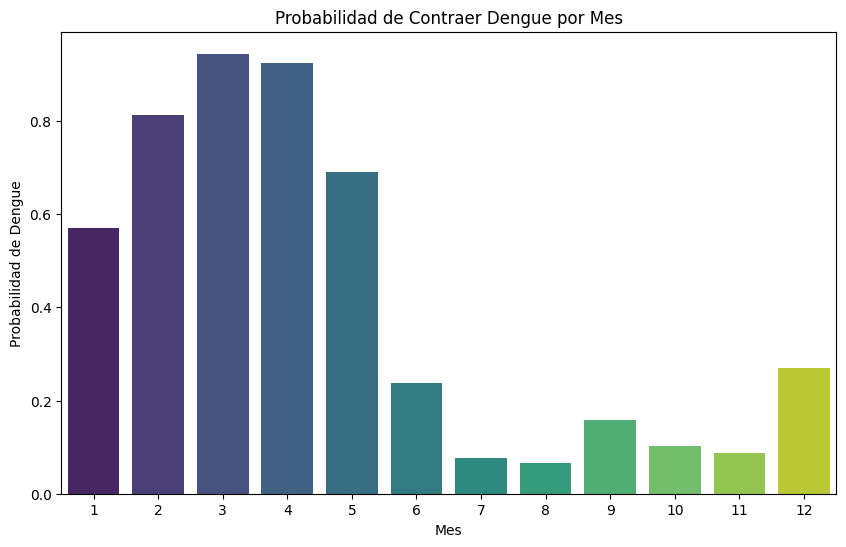

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = '/content/2024-06-17-output.csv'  # Cambia esta línea con la ruta a tu archivo CSV
data = pd.read_csv(url, delimiter=';')

# Asegurarse de que la columna de fecha esté en el formato datetime
data['fecha_inicio_semana_epidemiologica'] = pd.to_datetime(data['fecha_inicio_semana_epidemiologica'])
data.set_index('fecha_inicio_semana_epidemiologica', inplace=True)

# Crear las columnas 'mes' y 'año'
data['mes'] = data.index.month
data['año'] = data.index.year

# Crear la columna 'n_confirmados_total'
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']

# Seleccionar las columnas relevantes y hacer una copia
data_ml = data[['mes', 'n_confirmados_total']].copy()

# Crear una columna binaria objetivo
data_ml['dengue'] = (data_ml['n_confirmados_total'] > 0).astype(int)

# Definir las características (X) y la variable objetivo (y)
X = data_ml[['mes']]
y = data_ml['dengue']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con modelo
model = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Crear un DataFrame con los meses del año
months = pd.DataFrame({'mes': range(1, 13)})

# Predecir la probabilidad de contraer dengue para cada mes
predictions = model.predict_proba(months)[:, 1]  # Probabilidad de la clase '1' (dengue)

# Agregar las predicciones al DataFrame
months['probabilidad_dengue'] = predictions

# Mostrar las predicciones
print(months)

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
sns.barplot(x='mes', y='probabilidad_dengue', data=months, palette='viridis')
plt.title('Probabilidad de Contraer Dengue por Mes')
plt.xlabel('Mes')
plt.ylabel('Probabilidad de Dengue')
plt.show()


**La misma prediccion pero con el algoritmo StatifiedKfold**

Accuracy scores for each fold: [0.8381985  0.81818182 0.84891486 0.82136895 0.80217028]
Mean accuracy score: 0.8257668814162052
Precision scores for each fold: [0.84167518 0.8241206  0.84568528 0.824      0.80848963]
Mean precision score: 0.8287941391409991
Recall scores for each fold: [0.95480881 0.95017381 0.96635731 0.95591647 0.95011601]
Mean recall score: 0.9554744819910044
F1 scores for each fold: [0.8946797  0.88266954 0.90200325 0.88506982 0.8736    ]
Mean F1 score: 0.8876044598062155
    mes  probabilidad_dengue
0     1             0.564724
1     2             0.815961
2     3             0.942674
3     4             0.925697
4     5             0.700766
5     6             0.234923
6     7             0.109124
7     8             0.076937
8     9             0.112917
9    10             0.080708
10   11             0.095591
11   12             0.268486


<ipython-input-4-cd9ac43dac8b>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='probabilidad_dengue', data=months, palette='viridis')


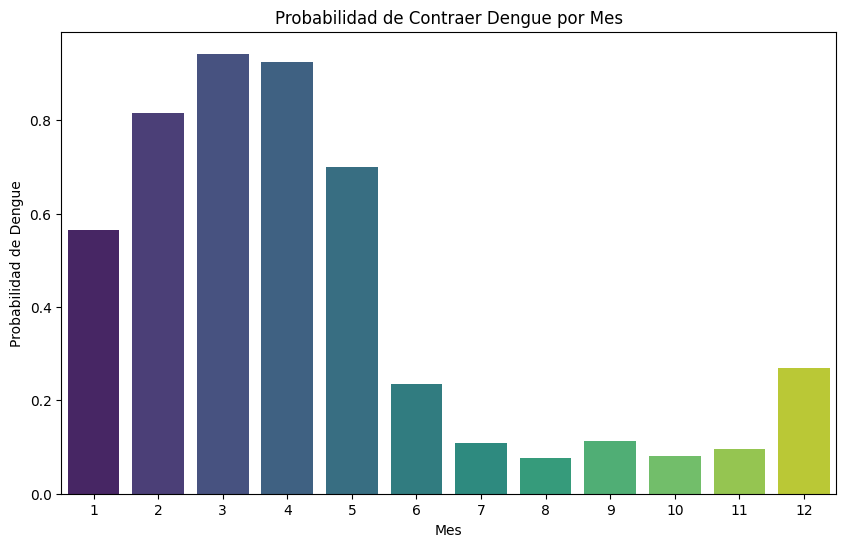

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = '/content/2024-06-17-output.csv'  # Cambia esta línea con la ruta a tu archivo CSV
data = pd.read_csv(url, delimiter=';')

# Asegurarse de que la columna de fecha esté en el formato datetime
data['fecha_inicio_semana_epidemiologica'] = pd.to_datetime(data['fecha_inicio_semana_epidemiologica'])
data.set_index('fecha_inicio_semana_epidemiologica', inplace=True)

# Crear las columnas 'mes' y 'año'
data['mes'] = data.index.month
data['año'] = data.index.year

# Crear la columna 'n_confirmados_total'
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']

# Seleccionar las columnas relevantes y hacer una copia
data_ml = data[['mes', 'n_confirmados_total']].copy()

# Crear una columna binaria objetivo
data_ml['dengue'] = (data_ml['n_confirmados_total'] > 0).astype(int)

# Definir las características (X) y la variable objetivo (y)
X = data_ml[['mes']]
y = data_ml['dengue']

# Crear un pipeline con modelo
model = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Crear el objeto StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el modelo usando cross_validate con StratifiedKFold
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model, X, y, cv=strat_k_fold, scoring=scoring)

# Mostrar las métricas para cada fold
print(f'Accuracy scores for each fold: {scores["test_accuracy"]}')
print(f'Mean accuracy score: {scores["test_accuracy"].mean()}')
print(f'Precision scores for each fold: {scores["test_precision"]}')
print(f'Mean precision score: {scores["test_precision"].mean()}')
print(f'Recall scores for each fold: {scores["test_recall"]}')
print(f'Mean recall score: {scores["test_recall"].mean()}')
print(f'F1 scores for each fold: {scores["test_f1"]}')
print(f'Mean F1 score: {scores["test_f1"].mean()}')

# Entrenar el modelo en todo el conjunto de datos
model.fit(X, y)

# Crear un DataFrame con los meses del año
months = pd.DataFrame({'mes': range(1, 13)})

# Predecir la probabilidad de contraer dengue para cada mes
predictions = model.predict_proba(months)[:, 1]  # Probabilidad de la clase '1' (dengue)

# Agregar las predicciones al DataFrame
months['probabilidad_dengue'] = predictions

# Mostrar las predicciones
print(months)

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
sns.barplot(x='mes', y='probabilidad_dengue', data=months, palette='viridis')
plt.title('Probabilidad de Contraer Dengue por Mes')
plt.xlabel('Mes')
plt.ylabel('Probabilidad de Dengue')
plt.show()


**Predecir el rango etario con mayor probabilidad de contraer dengue**

Preparar los datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = '/content/2024-06-17-output.csv'  # Cambia esta línea con la ruta a tu archivo CSV
data = pd.read_csv(url, delimiter=';')

# Asegurarse de que la columna de fecha esté en el formato datetime
data['fecha_inicio_semana_epidemiologica'] = pd.to_datetime(data['fecha_inicio_semana_epidemiologica'])
data.set_index('fecha_inicio_semana_epidemiologica', inplace=True)

# Crear la columna 'n_confirmados_total'
data['n_confirmados_total'] = data['n_confirmados_probables_fis'] + data['n_confirmados_por_laboratorio']

# Seleccionar las columnas relevantes y hacer una copia
data_ml = data[['grupo_etario', 'n_confirmados_total']].copy()

# Crear una columna binaria objetivo
data_ml['dengue'] = (data_ml['n_confirmados_total'] > 0).astype(int)

# Definir las características (X) y la variable objetivo (y)
X = data_ml[['grupo_etario']]
y = data_ml['dengue']

Dividir los datos en conjuntos de entrenamiento y prueba y entrenar el modelo

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       329
           1       0.73      1.00      0.84       870

    accuracy                           0.73      1199
   macro avg       0.86      0.50      0.42      1199
weighted avg       0.80      0.73      0.61      1199

Accuracy del modelo: 0.725604670558799
   grupo_etario  predicted_prob
0       [40,50)        0.736946
1       [50,60)        0.717788
2       [20,30)        0.705575
3       [30,40)        0.727403
4       [60,70)        0.719323
5        [0,10)        0.610467
6       [10,20)        0.769377
7       [70,80)        0.779542
8       [80,90)        0.726413
9      [90,100)        0.564575
10    [110,120]        0.617210
11    [100,110)        0.759681


<ipython-input-2-813ecdec1c4d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo_etario', y='predicted_prob', data=group_etarios, palette='viridis')


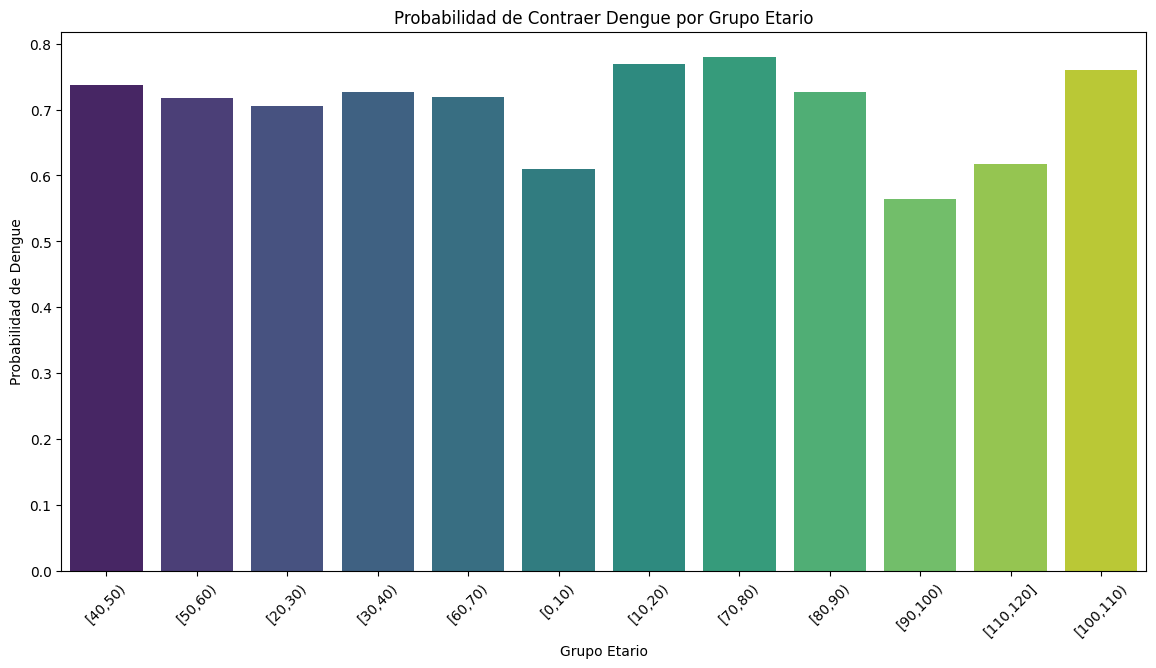

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: OneHotEncoding para la columna categórica 'grupo_etario'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['grupo_etario'])
    ])

# Crear un pipeline con preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

# Calcular y mostrar el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

# Mostrar las predicciones para diferentes rangos etarios
group_etarios = pd.DataFrame({'grupo_etario': data['grupo_etario'].unique()})
group_etarios['predicted_prob'] = model.predict_proba(group_etarios)[:, 1]

print(group_etarios)

# Visualizar las predicciones
plt.figure(figsize=(14, 7))
sns.barplot(x='grupo_etario', y='predicted_prob', data=group_etarios, palette='viridis')
plt.title('Probabilidad de Contraer Dengue por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Probabilidad de Dengue')
plt.xticks(rotation=45)
plt.show()


# **8. Tablero de comando**

https://lookerstudio.google.com/s/tiViVkzD9VM

# **Conclusiones y trabajos futuros**

A continuación se va a puntear lo descubierto en el análisis que fuimos haciendo referidos a las hipótesis planteadas en un principio:


1. Los grupos etarios que más suelen ser propensos a contrear el dengue son los jóvenes y adultos.
2. Los grupos etarios que son infectados y luego son más propensos a internación son los infantes y adolescentes.
3. Los grupos etarios que son infectados, pasaron por una internación y luego son más propensos a fallecer son los adultos mayores.
4. En el año las etapas en donde los casos confirmados de dengue suben son los primeros 5 meses, en las estaciones de verano y otoño.
5. Las condiciones climáticas que se dan para que los casos confirmados de dengue crezcan son temperaturas media-alta, humedad entre 65% a 75% y altas caidas de precipitación. Justamente son las condiciones perfectas para el ciclo de vida de los mosquitos.
6. Las comunas que más se ven afectadas en crecida de casos confirmados son las número 11, 15, 9 y 4. Definidas como zonas críticas


A partir de lo descubierto por el análisis exploratorio pensamos planes estratégicos para implementaciones futuras con el objetivo de mitigar los efectos que genera la enfermedad del Dengue (desde problemas humanitarios como cuidado de recursos del Gobierno):


---


- Plan de voluntariado para realizar limpiezas dentro de los hogares (patios, terrazas, lugares posibles de criaderos de mosquitos), de las comunas donde hay más activación de mosquitos y focalizando aquellos hogares donde residan infantes y adultos mayores. Con esto habria una reduccion en los infectados, internados y fallecimientos.
---
- Suele haber un rango de 15 días de pronostico de hoy  a futuro, si el pronostico meteorológico predice que habrán precipitaciones altas,  bajo temperaturas media-alta y humedad dentro del rango de 65% a 70%. Se debe tener un área de equipo especializado en fumigaciones y limpieza para fumigar y limpiar en todas las comunas pero poniendo más esfuerzo en las comunas críticas (11, 15, 9, 4), luego de darse las condiciones climáticas. Además según el ciclo de vida del mosquito luego de este estado meteorológico probablemente los mosquitos hembras pongan huevos en agua estancada (criaderos) por lo que la limpieza va a ser esencial. Con esto habria una reduccion en los infectados, internados y fallecimientos, el nacimiento de los mosquitos puede evitarse y se gastaria menos presupuesto por poner foco en zonas criticas.
---
- Una aplicación dedicada a dar informes sobre el dengue dentro de CABA y que contenga algun tipo de botón de pánico para en el caso de que una persona se encuentre con un criadero de mosquitos (agua estancada, pared húmeda con muchos mosquitos estacionados), pueda notificar para que llegue un fumigador a trabajar sobre ello, también se notificaría a los vecinos de la zona para que tengan cuidado y se protejan con el uso de repelentes o capas de ropa si van a pasar por esa zona. Con esto se reducirian los infectador, internados y fallecimientos, el nacimineto de los mosquitos puede evitarse y la cantidad de mosquitos puede reducirse, tambien los residentes de CABA pueden estar informados sobre el dengue.



# **PREPARACIÓN DATASETS AUXILIARES**



- Proyecciones de población por grupo de edad y comuna según sexo. Ciudad de Buenos Aires. Años 2010/2025 : https://www.estadisticaciudad.gob.ar/eyc/?p=79970 (necesitamos datos de población del 2024 por comuna y grupo etario)


In [ ]:
import pandas as pd

# Crear DataFrame
df = pd.read_csv('/content/distribucion_poblacion_comuna.csv', sep=';')

# Eliminar puntos de los números representados como strings y convrtirlos a tipo de datos numérico int
columns_to_replace = ['Total', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
df[columns_to_replace] = df[columns_to_replace].astype(str).applymap(lambda x: x.replace('.', ''))
df[columns_to_replace] = df[columns_to_replace].apply(pd.to_numeric)

# Calcular el total de poblacion para cada grupo de edad
total_0_10 = df.loc[df['Edad'].isin(['0-4', '5-9'])].iloc[:, 1:].sum()
total_10_20 = df.loc[df['Edad'].isin(['10-14', '15-19'])].iloc[:, 1:].sum()
total_20_30 = df.loc[df['Edad'].isin(['20-24', '25-29'])].iloc[:, 1:].sum()
total_30_40 = df.loc[df['Edad'].isin(['30-34', '35-39'])].iloc[:, 1:].sum()
total_40_50 = df.loc[df['Edad'].isin(['40-44', '45-49'])].iloc[:, 1:].sum()
total_50_60 = df.loc[df['Edad'].isin(['50-54', '55-59'])].iloc[:, 1:].sum()
total_60_70 = df.loc[df['Edad'].isin(['60-64', '65-69'])].iloc[:, 1:].sum()
total_70_80 = df.loc[df['Edad'].isin(['70-74', '75-79'])].iloc[:, 1:].sum()
total_80_90 = df.loc[df['Edad'].isin(['80 y más'])].iloc[:, 1:].sum()

# Crear nueva fila con los porcentajes haciendo el calculo, se redondea a dos decimales y se crea la fila con el nombre del grupo etario
total_0_10_percentage = (total_0_10 / total_0_10['Total']) * 100
total_0_10_percentage = total_0_10_percentage.round(2)
total_0_10_percentage['Edad'] = '[0, 10)'

total_10_20_percentage = (total_10_20 / total_10_20['Total']) * 100
total_10_20_percentage = total_10_20_percentage.round(2)
total_10_20_percentage['Edad'] = '[10, 20)'

total_20_30_percentage = (total_20_30 / total_20_30['Total']) * 100
total_20_30_percentage = total_20_30_percentage.round(2)
total_20_30_percentage['Edad'] = '[20, 30)'

total_30_40_percentage = (total_30_40 / total_30_40['Total']) * 100
total_30_40_percentage = total_30_40_percentage.round(2)
total_30_40_percentage['Edad'] = '[30, 40)'

total_40_50_percentage = (total_40_50 / total_40_50['Total']) * 100
total_40_50_percentage = total_40_50_percentage.round(2)
total_40_50_percentage['Edad'] = '[40, 50)'

total_50_60_percentage = (total_50_60 / total_50_60['Total']) * 100
total_50_60_percentage = total_50_60_percentage.round(2)
total_50_60_percentage['Edad'] = '[50, 60)'

total_60_70_percentage = (total_60_70 / total_60_70['Total']) * 100
total_60_70_percentage = total_60_70_percentage.round(2)
total_60_70_percentage['Edad'] = '[60, 70)'

total_70_80_percentage = (total_70_80 / total_70_80['Total']) * 100
total_70_80_percentage = total_70_80_percentage.round(2)
total_70_80_percentage['Edad'] = '[70, 80)'

total_80_90_percentage = (total_80_90 / total_80_90['Total']) * 100
total_80_90_percentage = total_80_90_percentage.round(2)
total_80_90_percentage['Edad'] = '[80, 90)'

total_90_100_percentage = (total_80_90 / total_80_90['Total']) * 100
total_90_100_percentage = total_90_100_percentage.round(2)
total_90_100_percentage['Edad'] = '[90, 100)'

total_100_110_percentage = (total_80_90 / total_80_90['Total']) * 100
total_100_110_percentage = total_100_110_percentage.round(2)
total_100_110_percentage['Edad'] = '[100, 110)'

total_110_120_percentage = (total_80_90 / total_80_90['Total']) * 100
total_110_120_percentage = total_110_120_percentage.round(2)
total_110_120_percentage['Edad'] = '[110, 120]'


# Eliminar las filas correspondientes a los grupos de edades del DataFrame original
filas_eliminar = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 y más']
df_filtered = df[~df['Edad'].isin(filas_eliminar)]


# Agrego los porcentajes calculados a las filas de los grupos etarios
total_0_10_percentage_df = pd.DataFrame(total_0_10_percentage).transpose()  # Transponer para que sea una fila

total_10_20_percentage_df = pd.DataFrame(total_10_20_percentage).transpose()

total_20_30_percentage_df = pd.DataFrame(total_20_30_percentage).transpose()

total_30_40_percentage_df = pd.DataFrame(total_30_40_percentage).transpose()

total_40_50_percentage_df = pd.DataFrame(total_40_50_percentage).transpose()

total_50_60_percentage_df = pd.DataFrame(total_50_60_percentage).transpose()

total_60_70_percentage_df = pd.DataFrame(total_60_70_percentage).transpose()

total_70_80_percentage_df = pd.DataFrame(total_70_80_percentage).transpose()

total_80_90_percentage_df = pd.DataFrame(total_80_90_percentage).transpose()

total_90_100_percentage_df = pd.DataFrame(total_90_100_percentage).transpose()

total_100_110_percentage_df = pd.DataFrame(total_100_110_percentage).transpose()

total_110_120_percentage_df = pd.DataFrame(total_110_120_percentage).transpose()


# Concatenar el DataFrame filtrado con la nueva fila
df_final = pd.concat([df_filtered, total_0_10_percentage_df, total_10_20_percentage_df, total_20_30_percentage_df, total_30_40_percentage_df, total_40_50_percentage_df, total_50_60_percentage_df, total_60_70_percentage_df, total_70_80_percentage_df, total_80_90_percentage_df, total_90_100_percentage_df, total_100_110_percentage_df, total_110_120_percentage_df], ignore_index=True)


# Elimino la columna Total
df_final = df_final.drop(columns='Total')


# Transponer el DataFrame (cambio filas por columnas) tomo la columna edad como guia de indices
df_final_transposed = df_final.set_index('Edad').transpose().reset_index()


# Agregar la columna 'nro_comuna' del 1 al 15 y una columna de 'porcentaje_total0 con valores 100 (totales)
df_final_transposed['nro_comuna'] = df_final_transposed.index + 1
df_final_transposed['porcentaje_total'] = 100.0


# Ordeno las columnas
column_order = ['nro_comuna', 'porcentaje_total', '[0, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)', '[90, 100)', '[100, 110)', '[110, 120]']
df_final_transposed = df_final_transposed.reindex(columns=column_order)


# Mostrar el DataFrame final
print(df_final_transposed)


#Guardar el dataframe en un archivo
df_final_transposed.to_csv('distribucion_proyectual_porcentual_poblacion_comuna_caba_2024.csv', sep=';', index=False)

- Distribución porcentual y proyectual de la población por grupos de edad según comuna generado. Fusión de los datasets sobre poblacion, edades y comunas, desde 2022 al 2024

In [ ]:
import pandas as pd

# Crear los dataframes
df_2022 = pd.read_csv('/content/distribucion_porcentual_poblacion_comuna_caba_2022.csv', sep=';')
df_2023 = pd.read_csv('/content/distribucion_porcentual_poblacion_comuna_caba_2023.csv', sep=';')
df_2024 = pd.read_csv('/content/distribucion_proyectual_porcentual_poblacion_comuna_caba_2024.csv', sep=';')

# Agregar una columna de año a cada DataFrame
df_2022['ano'] = 2022
df_2023['ano'] = 2023
df_2024['ano'] = 2024


# Concatenar los DataFrames del 2023 y 2022 en uno solo (cumplen la caracteristicas que sus valores float son con coma, deberian ser con punto)
df_22_23_combined = pd.concat([df_2022, df_2023], ignore_index=True)

# Reemplazar comas por puntos y convertir a tipo float solo para 2022 y 2023
columnas_porcentaje_grupo_etario = ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)', '[90, 100)', '[100, 110)', '[110, 120]']
for columna in columnas_porcentaje_grupo_etario:
    df_22_23_combined[columna] = df_22_23_combined[columna].str.replace(',', '.', regex=False)
    df_22_23_combined[columna] = pd.to_numeric(df_22_23_combined[columna], errors='coerce')

# Concatenar con el dataframe del 2024, que si cumplía bien la condicion
df_combined = pd.concat([df_22_23_combined, df_2024], ignore_index=True)

# Arreglo el formato de las columnas de grupo etario para que sean igual a las del dataset del dengue  ej: [0,10)
df_combined.rename(columns=lambda x: x.replace(', ', ','), inplace=True)

# Guardar el Dataframe generado en un archivo
df_combined.to_csv('distribucion_porcentual_proyectual_poblacion_comuna_caba_generado_2022_2024.csv', sep=';', index=False)

- Datasets sobre datos meteorológicos:
https://www.estadisticaciudad.gob.ar/eyc/?p=77719 y https://www.meteored.com.ar/tiempo-en_Buenos+Aires-America+Sur-Argentina-Ciudad+Autonoma+de+Buenos+Aires-SABE-sactual-13584.html




In [ ]:
import pandas as pd

# Crear DataFrame del dataset meteorologico de hurlingham
datasetMeteorologicoHurlinghamFrame = pd.read_csv('/content/Temperatura_y_precipitacion_Hurlingham_desde_2018.csv', sep=';')

# Columnas de datos a extraer: Fecha - Temperatura_Abrigo_150cm_Maxima - Temperatura_Abrigo_150cm_Minima - Precipitacion_Pluviometrica - Humedad_Media_8_14_20
datasetMeteorologicoHurlinghamFrame_modificado = datasetMeteorologicoHurlinghamFrame[['Fecha', 'Temperatura_Abrigo_150cm_Maxima', 'Temperatura_Abrigo_150cm_Minima', 'Precipitacion_Pluviometrica', 'Humedad_Media_8_14_20']]

# Cambio los nombres de las columnas
datasetMeteorologicoHurlinghamFrame_modificado = datasetMeteorologicoHurlinghamFrame_modificado.rename(columns={'Temperatura_Abrigo_150cm_Maxima':'Temperatura_Maxima', 'Temperatura_Abrigo_150cm_Minima':'Temperatura_Minima', 'Humedad_Media_8_14_20':'Humedad_Media'})

#print(datasetMeteorologicoHurlinghamFrame_modificado)

# Crear DataFrame del dataset meteorologico de datos tomados de la base SABE
datasetMeteorologicoSABEFrame = pd.read_csv('/content/SABE_meteorologia.csv', sep=';')

# Calcular la Media de las columnas Humedad Maxima y Minima formando una nueva columna llamada Humedad_Media
datasetMeteorologicoSABEFrame['Humedad_Media'] = (datasetMeteorologicoSABEFrame['Humedad_Maxima'] + datasetMeteorologicoSABEFrame['Humedad_Minima']) / 2

# Eliminar las columnas de Humedad Max y Min
datasetMeteorologicoSABEFrame_modificado = datasetMeteorologicoSABEFrame.drop(columns=['Humedad_Maxima', 'Humedad_Minima'])

#print(datasetMeteorologicoSABEFrame_modificado)


# Concatenar los DataFrames
datasetMeteoroloficoFrame_concatenado = pd.concat([datasetMeteorologicoHurlinghamFrame_modificado, datasetMeteorologicoSABEFrame_modificado], ignore_index=True)

# print(datasetMeteoroloficoFrame_concatenado)

# Agrupar los datos por semana, tomando por semana la media de todos los datos

# Convertir la columna 'Fecha' a datetime
datasetMeteoroloficoFrame_concatenado['Fecha'] = pd.to_datetime(datasetMeteoroloficoFrame_concatenado['Fecha'])

# Necesimatos los datos de a partir del 3/7/2022
datasetMeteoroloficoFrame_concatenado = datasetMeteoroloficoFrame_concatenado[datasetMeteoroloficoFrame_concatenado['Fecha'] >= '2022-07-03']

#print(datasetMeteoroloficoFrame_concatenado)

# Crear una columna que represente el inicio de la semana
datasetMeteoroloficoFrame_concatenado['Semana_Meteorologica'] = datasetMeteoroloficoFrame_concatenado['Fecha'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar por la columna 'Semana:Meteorologica' y calcular la media
datasetMeteoroloficoFrame_semanal = datasetMeteoroloficoFrame_concatenado.groupby('Semana_Meteorologica').mean().reset_index()

# Agregar una nueva columna 'Numero_Semana_Año' que represente el número de semana en el año
datasetMeteoroloficoFrame_semanal['Numero_Semana'] = datasetMeteoroloficoFrame_semanal['Fecha'].dt.isocalendar().week + 1

# Redondear los valores de las columnas de tipo float a dos decimales
datasetMeteoroloficoFrame_semanal['Temperatura_Maxima'] = datasetMeteoroloficoFrame_semanal['Temperatura_Maxima'].round(2)
datasetMeteoroloficoFrame_semanal['Temperatura_Minima'] = datasetMeteoroloficoFrame_semanal['Temperatura_Minima'].round(2)
datasetMeteoroloficoFrame_semanal['Precipitacion_Pluviometrica'] = datasetMeteoroloficoFrame_semanal['Precipitacion_Pluviometrica'].round(2)
datasetMeteoroloficoFrame_semanal['Humedad_Media'] = datasetMeteoroloficoFrame_semanal['Humedad_Media'].round(2)

# Cambio los nombres de las columnas para referir a que son las medias
datasetMeteoroloficoFrame_semanal = datasetMeteoroloficoFrame_semanal.rename(columns={'Temperatura_Maxima':'Temperatura_Maxima_Media', 'Temperatura_Minima':'Temperatura_Minima_Media', 'Precipitacion_Pluviometrica':'Precipitacion_Pluviometrica_Media'})

datasetMeteoroloficoFrame_semanal = datasetMeteoroloficoFrame_semanal.drop(columns=['Semana_Meteorologica'])

print(datasetMeteoroloficoFrame_semanal)

print(datasetMeteoroloficoFrame_semanal.info())

# Guardar en un nuevo archivo el dataset meteorologico generado
datasetMeteoroloficoFrame_semanal.to_csv('datos_meteorologicos_caba.csv', sep=';', decimal='.', index=False)

        Fecha  Temperatura_Maxima_Media  Temperatura_Minima_Media  \
0  2022-07-03                     15.70                     -1.80   
1  2022-07-07                     16.26                      6.86   
2  2022-07-14                     13.66                      5.54   
3  2022-07-21                     18.19                      6.03   
4  2022-07-28                     19.77                      9.86   
..        ...                       ...                       ...   
90 2024-03-21                     24.00                     14.43   
91 2024-03-28                     25.57                     14.71   
92 2024-04-04                     22.14                     17.14   
93 2024-04-11                     22.00                     16.57   
94 2024-04-18                     23.14                     17.00   

    Precipitacion_Pluviometrica_Media  Humedad_Media  Numero_Semana  
0                                0.00          71.00             27  
1                              